In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2, f_classif, mutual_info_classif
import statistics
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import chi2 as chi_2
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score

In [35]:
pd.set_option('display.max_columns', None)
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# DATA EXPLORATION

In [36]:
df_train=pd.read_csv("train.csv")
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.000,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.000,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.000,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.000,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.000,satisfied


In [37]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.000,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.000,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.000,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.000,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.000,satisfied


In [38]:
print(df_test.shape)
print(df_train.shape)

(25976, 25)
(103904, 25)


In [39]:
len(df_train)/(len(df_train)+len(df_test)), len(df_test)/(len(df_train)+len(df_test))

(0.8, 0.2)

In [40]:
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [43]:
df_train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [44]:
df_test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [45]:
df_train.dropna(inplace=True),df_test.dropna(inplace=True)

(None, None)

In [46]:
df_train.reset_index(inplace=True), df_test.reset_index(inplace=True)

(None, None)

In [47]:
(df_train.index.values==df_train["Unnamed: 0"]).sum()==len(df_train)

False

In [48]:
(df_test.index.values==df_test["Unnamed: 0"]).sum()==len(df_test)

False

In [49]:
df_train.drop("Unnamed: 0",axis=1, inplace=True)

df_test.drop("Unnamed: 0",axis=1, inplace=True)

In [233]:
df=df_train.merge(df_test, how="outer")

In [51]:
df.shape, df_train.shape,df_test.shape

((129487, 25), (103594, 25), (25893, 25))

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129486
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   index                              129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      1294

In [53]:
df_train.isnull().sum()

index                                0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [54]:
for (columnName, columnData) in df.iteritems():
    print('\nColumn Name :', columnName)
    print("\nValues :\n", columnData.unique())
    print("\nDistribution :\n" , columnData.value_counts())
    


Column Name : index

Values :
 [    0     1     2 ... 23033 23505 24180]

Distribution :
 0        2
17302    2
17312    2
17311    2
17310    2
        ..
51929    1
51928    1
51927    1
51926    1
24180    1
Name: index, Length: 103656, dtype: int64

Column Name : id

Values :
 [ 70172   5047 110028 ...  37675  90086  34799]

Distribution :
 70172     1
101483    1
29483     1
127259    1
53818     1
         ..
46806     1
103893    1
78828     1
77219     1
34799     1
Name: id, Length: 129487, dtype: int64

Column Name : Gender

Values :
 ['Male' 'Female']

Distribution :
 Female    65703
Male      63784
Name: Gender, dtype: int64

Column Name : Customer Type

Values :
 ['Loyal Customer' 'disloyal Customer']

Distribution :
 Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

Column Name : Age

Values :
 [13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 4

In [55]:
print(df_train["satisfaction"].value_counts(normalize=True),"\n")
print(df_test["satisfaction"].value_counts(normalize=True))

neutral or dissatisfied   0.567
satisfied                 0.433
Name: satisfaction, dtype: float64 

neutral or dissatisfied   0.561
satisfied                 0.439
Name: satisfaction, dtype: float64


In [56]:
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].astype(int)

df_train["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].astype(int)

df_test["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].astype(int)

In [57]:
df.drop(["id","index"],axis=1, inplace=True)

df_train.drop("id",axis=1, inplace=True)

df_test.drop("id",axis=1, inplace=True)

In [58]:
categorical=["Gender","Customer Type","Type of Travel","Class","Inflight wifi service","Departure/Arrival time convenient",
            "Ease of Online booking","Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
            "On-board service","Leg room service","Baggage handling","Checkin service","Inflight service","Cleanliness"]

numerical=["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]

target=["satisfaction"]


# DATA VISUALIZATION

In [206]:
len(categorical)

18

In [28]:
#ricordati di mettere l'impostazione per levare plt.show()

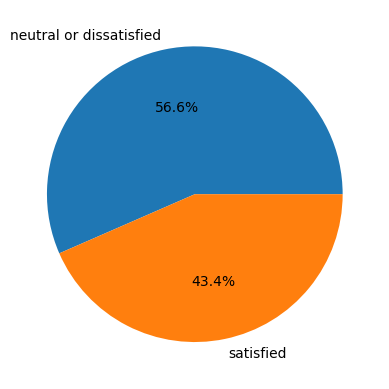

In [65]:
plt.pie(df["satisfaction"].value_counts(),labels=df["satisfaction"].unique(),
        autopct='%.1f%%')

plt.show()

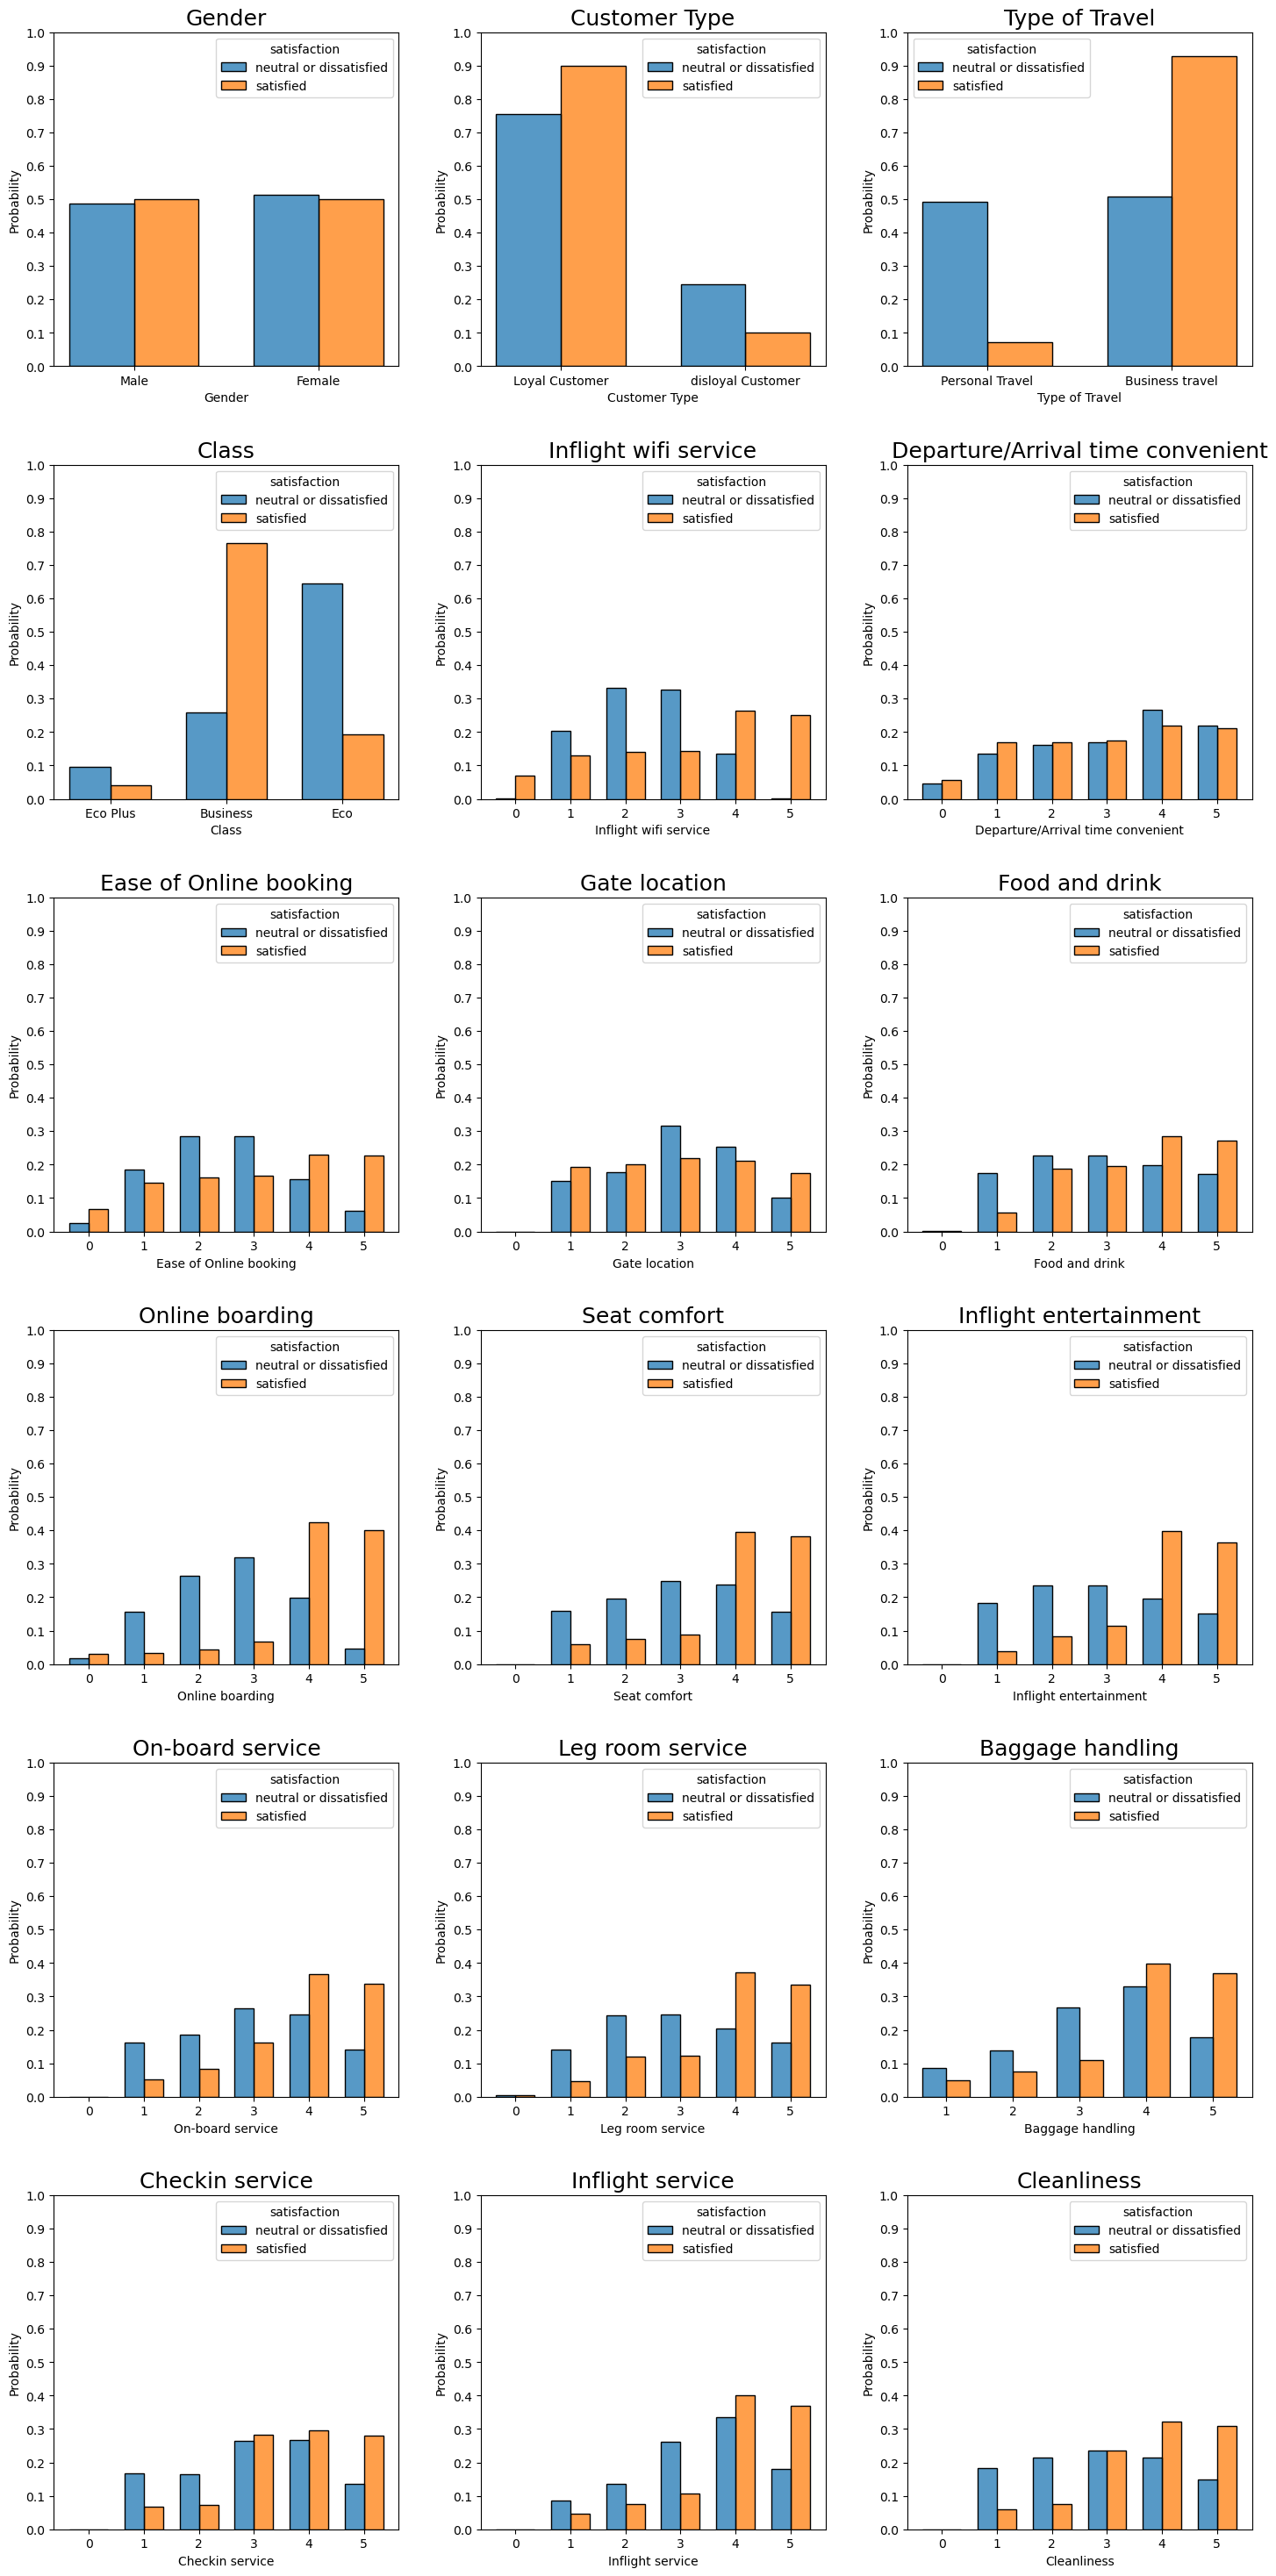

In [66]:
figure(figsize=(15, 30))

for i in range(len(categorical)):
    plt.subplot(6,3,i+1)
    sns.histplot(data=df,x=categorical[i], hue="satisfaction",multiple="dodge",stat="probability", common_norm=False,
                 shrink=0.7,element="bars",discrete=True)
    plt.title(categorical[i],fontsize=18)
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.ylim(0,1)
    
plt.tight_layout(pad=3.0)
plt.show()

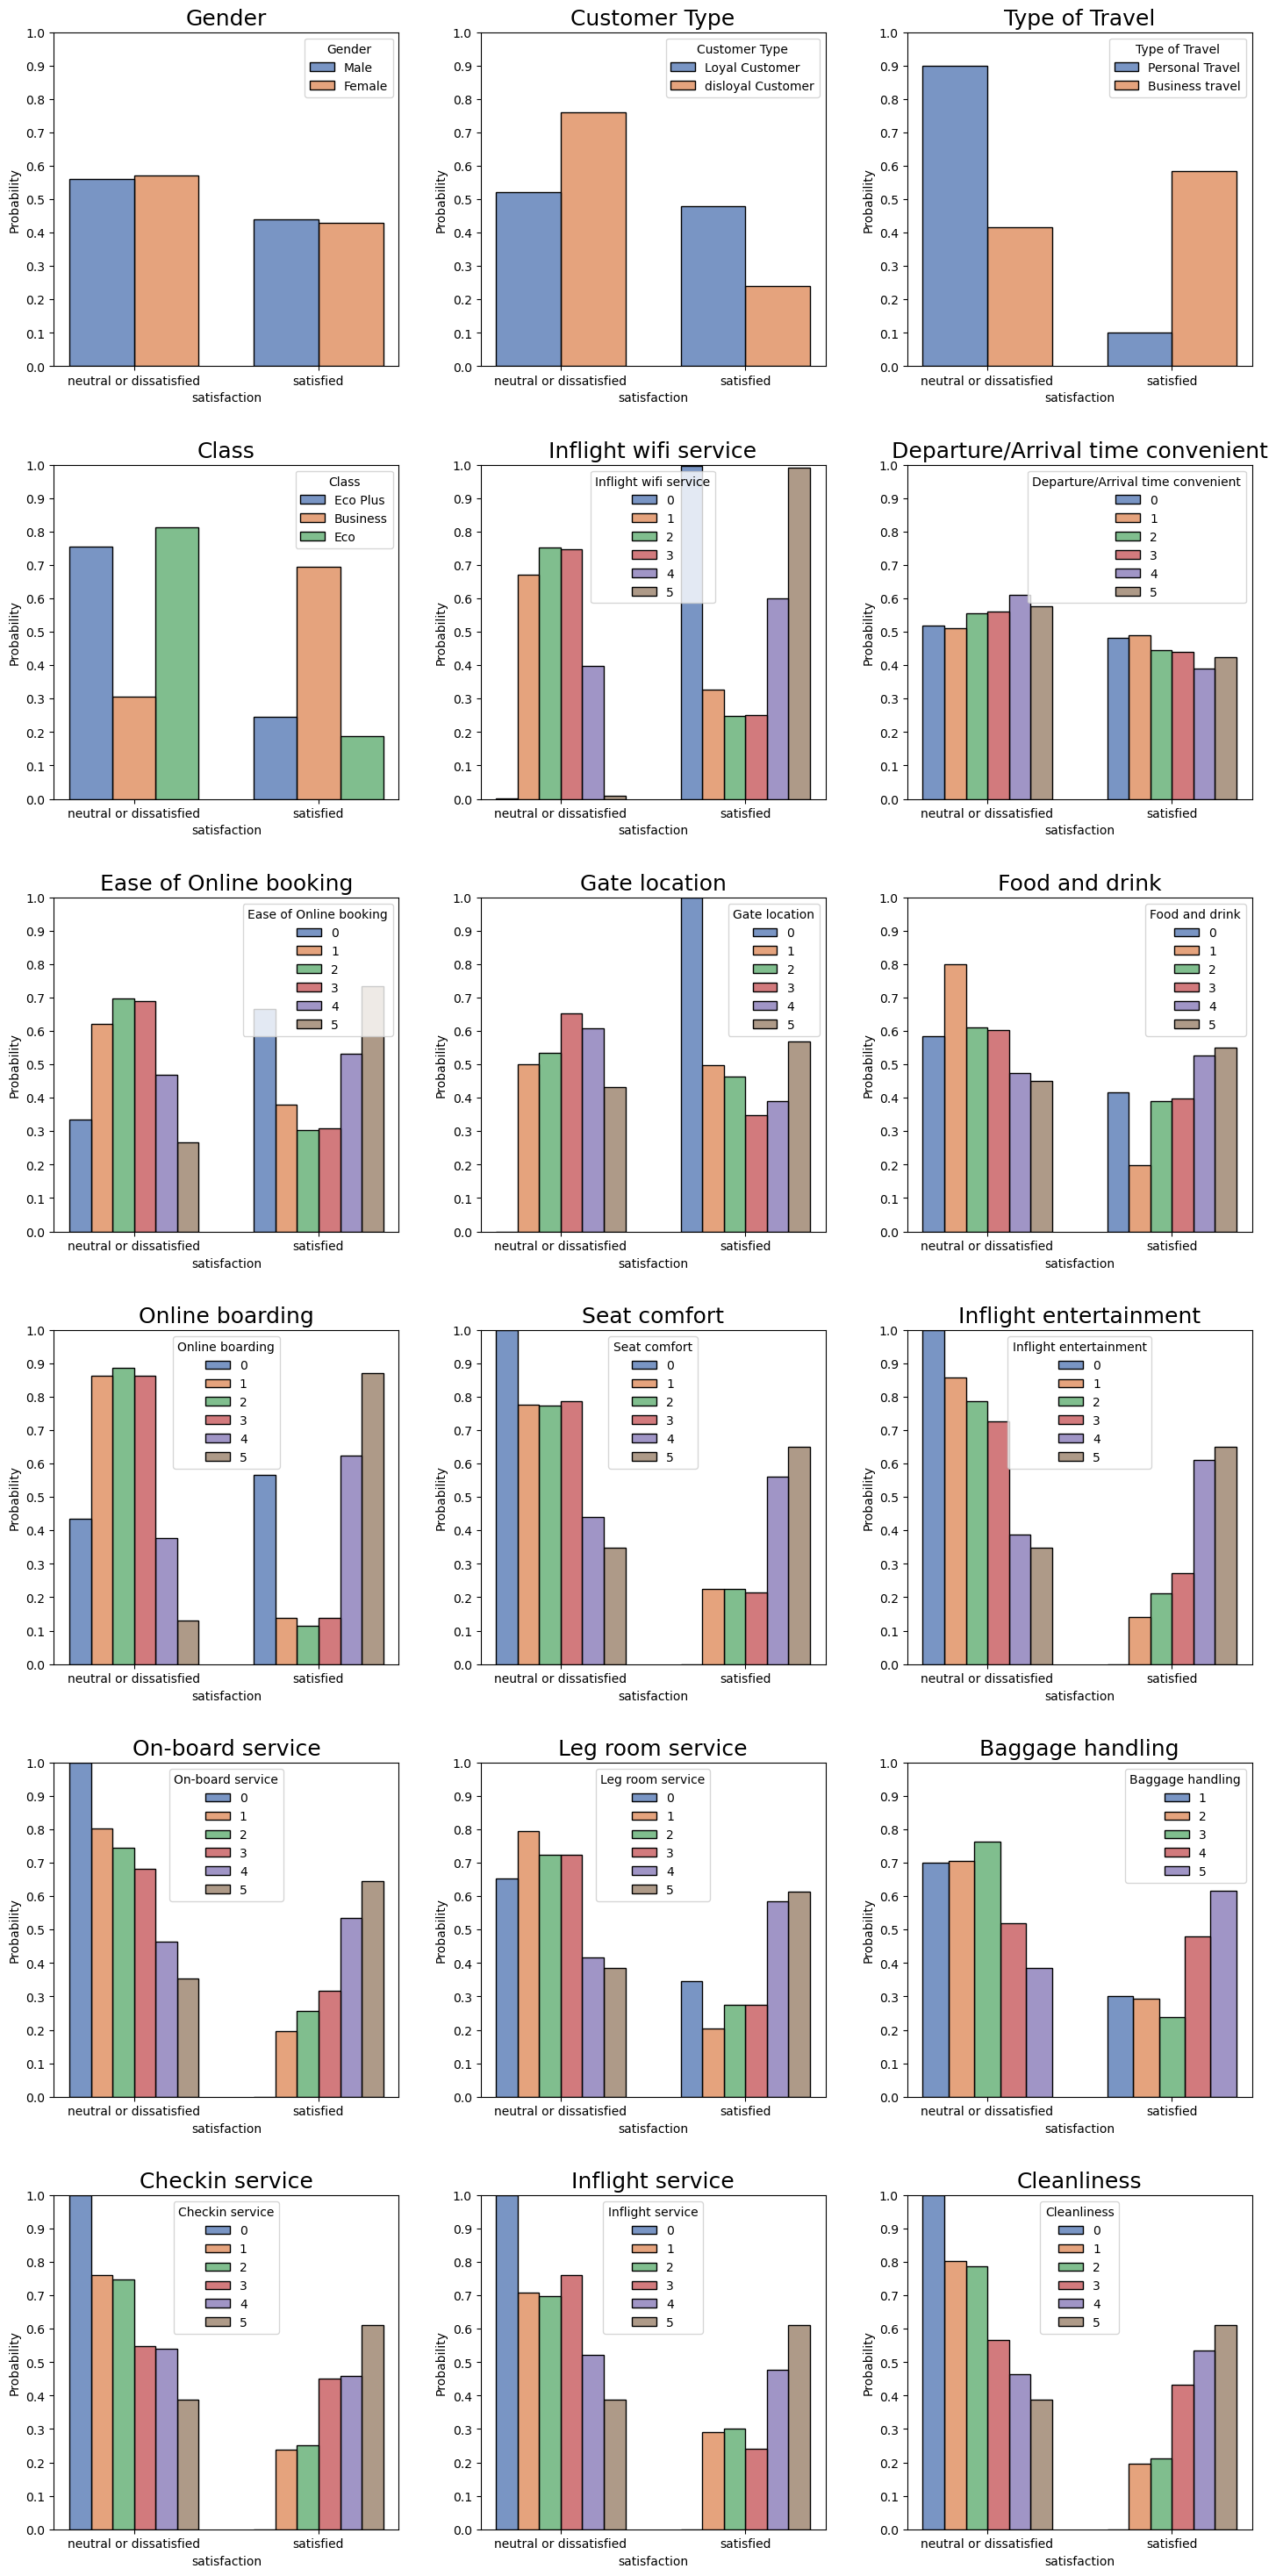

In [70]:
figure(figsize=(15, 30)) #cambia colore degli hue

for i in range(len(categorical)):
    plt.subplot(6,3,i+1)
    sns.histplot(data=df,x="satisfaction", hue=categorical[i], multiple="dodge",stat="probability", common_norm=False,
                 shrink=0.7,element="bars",discrete=True,palette="deep")
    plt.title(categorical[i],fontsize=18)
    plt.yticks(np.arange(0, 1.1, step=0.1))
    plt.ylim(0,1)
    
plt.tight_layout(pad=3.0)
plt.show()

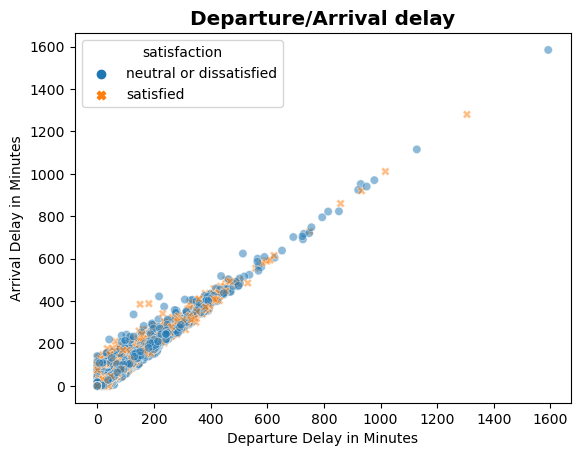

In [32]:
sns.scatterplot(data=df,x="Departure Delay in Minutes",y="Arrival Delay in Minutes", hue="satisfaction",style="satisfaction",
                alpha=0.5)

plt.title(label=("Departure/Arrival delay"),fontsize="x-large",fontweight="bold")

plt.show()

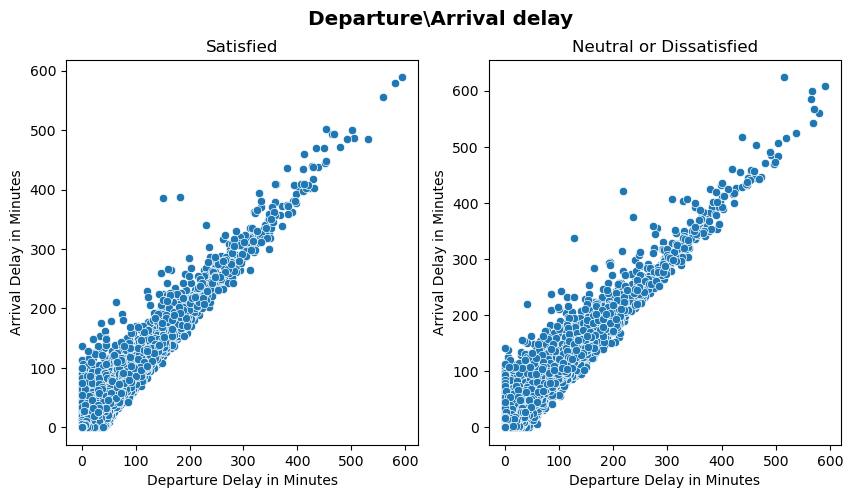

In [33]:
figure(figsize=(10,5))
plt.suptitle("Departure\Arrival delay",fontsize="x-large",fontweight="bold")

plt.subplot(1,2,1)
sns.scatterplot(data=df[(df["Departure Delay in Minutes"]<600) & (df["satisfaction"]=="satisfied")],
                x="Departure Delay in Minutes",y="Arrival Delay in Minutes")
plt.title(label="Satisfied")

plt.subplot(1,2,2)
sns.scatterplot(data=df[(df["Departure Delay in Minutes"]<600) & (df["satisfaction"]=="neutral or dissatisfied")],
                x="Departure Delay in Minutes",y="Arrival Delay in Minutes")
plt.title(label="Neutral or Dissatisfied")

plt.show()

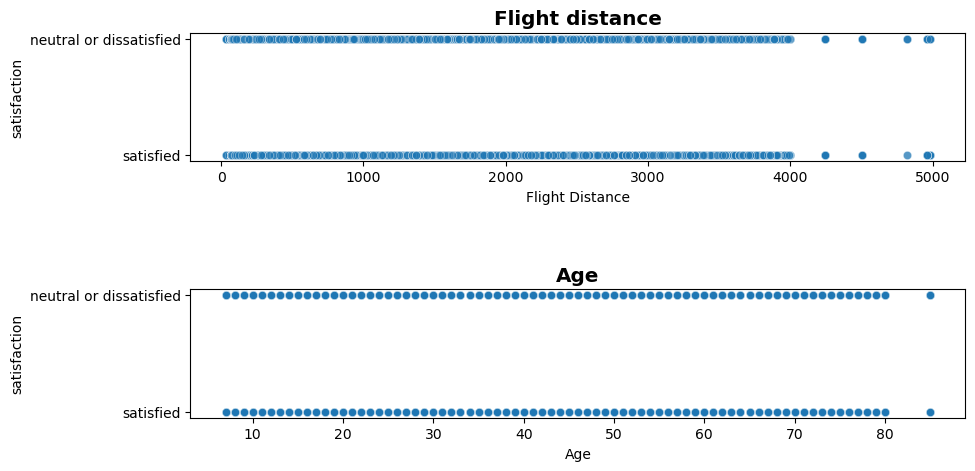

In [64]:
figure(figsize=(10,5)) #fai il groupby con l'age per avere una maggiore chiarezza della dirtibuzione

plt.subplot(2,1,1)
sns.scatterplot(data=df, x="Flight Distance",y="satisfaction",alpha=0.5)
plt.title("Flight distance",fontsize="x-large",fontweight="bold")

plt.subplot(2,1,2)
sns.scatterplot(data=df, x="Age",y="satisfaction",alpha=0.5)
plt.title("Age",fontsize="x-large",fontweight="bold")

plt.subplots_adjust(hspace=1)
plt.show()

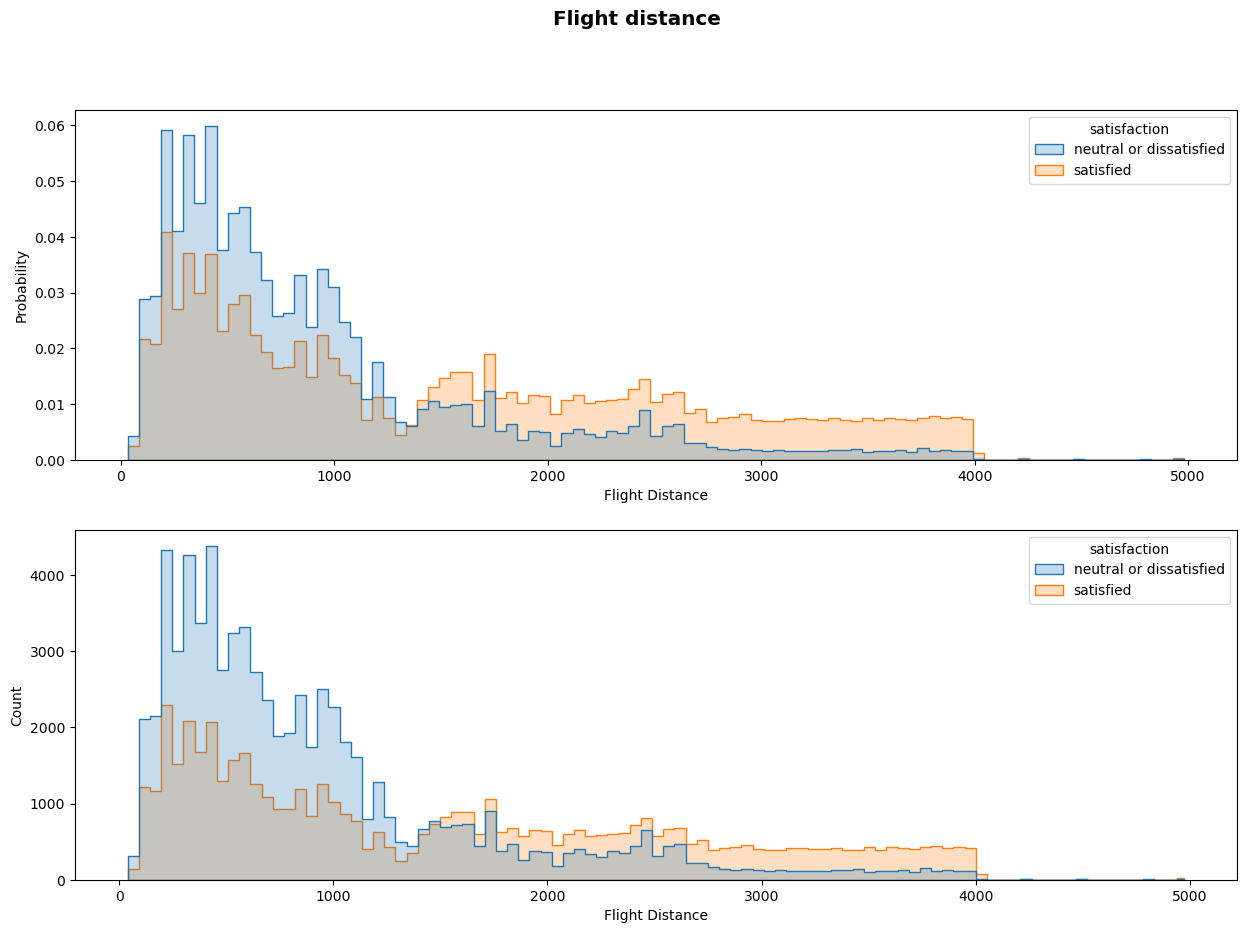

In [35]:
figure(figsize=(15,10))

plt.suptitle("Flight distance",fontsize="x-large",fontweight="bold")

plt.subplot(2,1,1)
sns.histplot(data=df,x='Flight Distance', hue='satisfaction', stat='probability', 
            common_norm= False,  multiple="layer", element='step')

plt.subplot(2,1,2)
sns.histplot(data=df,x="Flight Distance",hue="satisfaction",multiple="layer", common_norm=False,
                 shrink=0.7,element="step")

plt.show()

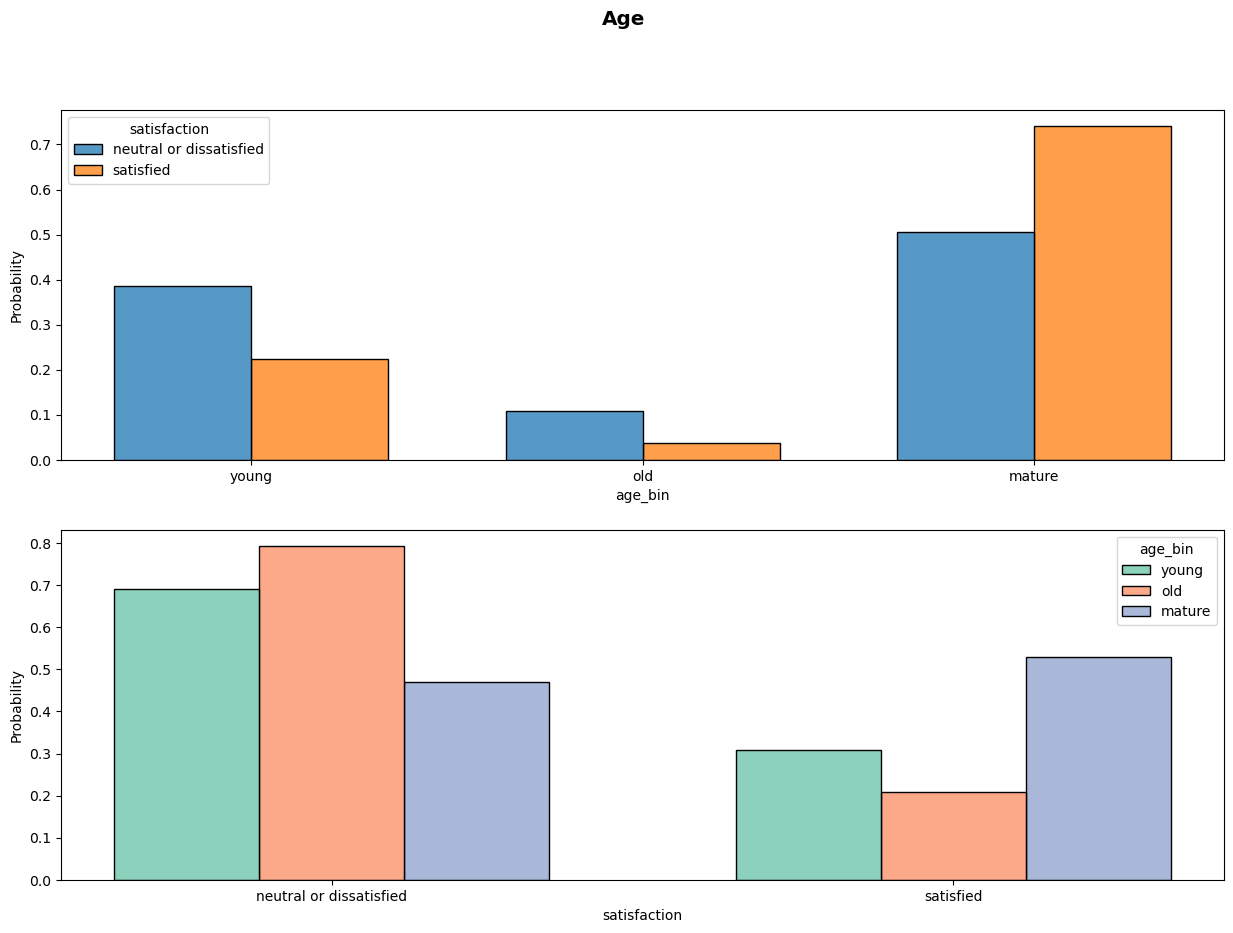

In [36]:
df_age=df
df_age["age_bin"]=df_age["Age"].apply(lambda x: "young" if x<31 else( "mature" if 30<x<61 else "old"))
#fare un group by con age_bin

figure(figsize=(15,10))

plt.suptitle("Age",fontsize="x-large",fontweight="bold")

plt.subplot(2,1,1)
sns.histplot(data=df_age,x='age_bin', hue='satisfaction', stat='probability', 
            common_norm= False,  multiple="dodge", shrink=0.7)

plt.subplot(2,1,2)
sns.histplot(data=df_age,hue="age_bin",x="satisfaction",multiple="dodge", common_norm=False,stat="probability",
                 shrink=0.7,palette="Set2")

plt.show()

# ENCODING CATEGORICAL FEATURES

In [71]:
for i in categorical:
    print(i,":", df[i].unique())

Gender : ['Male' 'Female']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco Plus' 'Business' 'Eco']
Inflight wifi service : [3 2 4 1 5 0]
Departure/Arrival time convenient : [4 2 5 3 1 0]
Ease of Online booking : [3 2 5 4 1 0]
Gate location : [1 3 2 5 4 0]
Food and drink : [5 1 2 4 3 0]
Online boarding : [3 5 2 1 4 0]
Seat comfort : [5 1 2 3 4 0]
Inflight entertainment : [5 1 2 3 4 0]
On-board service : [4 1 2 3 5 0]
Leg room service : [3 5 4 2 1 0]
Baggage handling : [4 3 5 1 2]
Checkin service : [4 1 3 5 2 0]
Inflight service : [5 4 3 1 2 0]
Cleanliness : [5 1 2 3 4 0]


In [72]:
cat_encoded=["Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking",
             "Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment",
             "On-board service","Leg room service","Checkin service","Inflight service","Cleanliness"]



In [73]:
X_cat_le_train=df_train[["Gender","Customer Type","Type of Travel"]].apply(LabelEncoder().fit_transform)
X_cat_le_test=df_test[["Gender","Customer Type","Type of Travel"]].apply(LabelEncoder().fit_transform)

oe=OrdinalEncoder(categories=[["Eco","Eco Plus","Business"]])
X_cat_oe_train=pd.Series(data=oe.fit_transform(np.array(df_train["Class"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Class")
X_cat_oe_test=pd.Series(data=oe.fit_transform(np.array(df_test["Class"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Class")

oe2=OrdinalEncoder(categories=[[0,1,2,3,4,5] for i in range(13)])
X_cat_oe2_train=pd.DataFrame(data=oe2.fit_transform(df_train[["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"]]).astype(int),
                                                                columns=["Inflight wifi service","Departure/Arrival time convenient",
                                                                       "Ease of Online booking","Gate location","Food and drink",
                                                                       "Online boarding","Seat comfort","Inflight entertainment",
                                                                       "On-board service","Leg room service","Checkin service",
                                                                       "Inflight service","Cleanliness"])
X_cat_oe2_test=pd.DataFrame(data=oe2.fit_transform(df_test[["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"]]).astype(int),
                                                              columns=["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"])

oe3=OrdinalEncoder(categories=[[1,2,3,4,5]])
X_cat_oe3_train=pd.Series(data=oe3.fit_transform(np.array(df_train["Baggage handling"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Baggage handling")
X_cat_oe3_test=pd.Series(data=oe3.fit_transform(np.array(df_test["Baggage handling"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Baggage handling")

y_train=pd.Series(LabelEncoder().fit_transform(df_train["satisfaction"]),name="satisfaction_train")
y_test=pd.Series(LabelEncoder().fit_transform(df_test["satisfaction"]),name="satisfaction_test")
y=y_train.append(y_test,ignore_index=True)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_7152\2628359804.py:40: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y=y_train.append(y_test,ignore_index=True)


In [74]:
X_cat_train=pd.concat([X_cat_le_train,X_cat_oe_train,X_cat_oe2_train,X_cat_oe3_train], axis=1)

X_cat_test=pd.concat([X_cat_le_test,X_cat_oe_test,X_cat_oe2_test,X_cat_oe3_test],axis=1)

# SCALING NUMERICAL FEATURES

##### Checking distribution of values

In [75]:
numerical

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

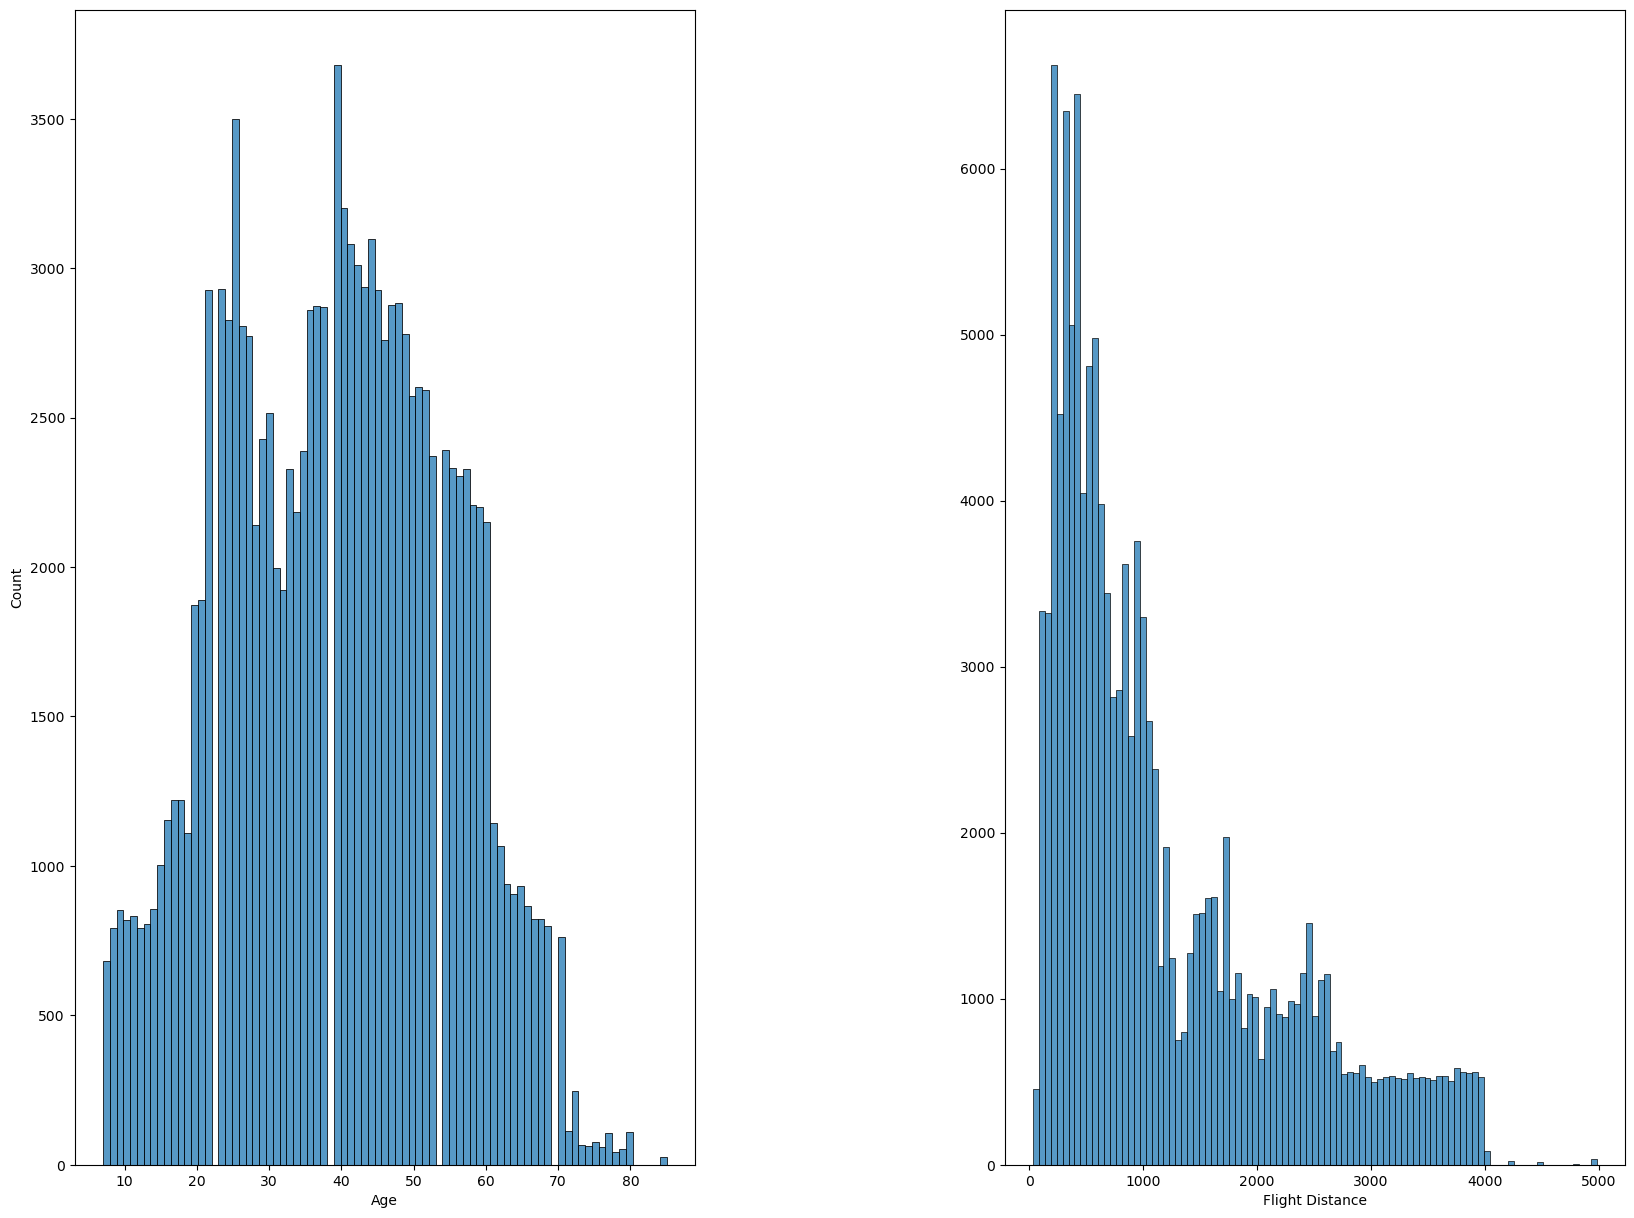

In [76]:
figure(figsize=(20,15))

for i in range(2):
    plt.subplot(1,2,i+1)
    sns.histplot(data=df,x=numerical[i])

plt.ylabel(None)
plt.subplots_adjust(wspace=0.5)    
plt.show()

In [77]:
print(sorted(df["Age"].unique()))

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 85]


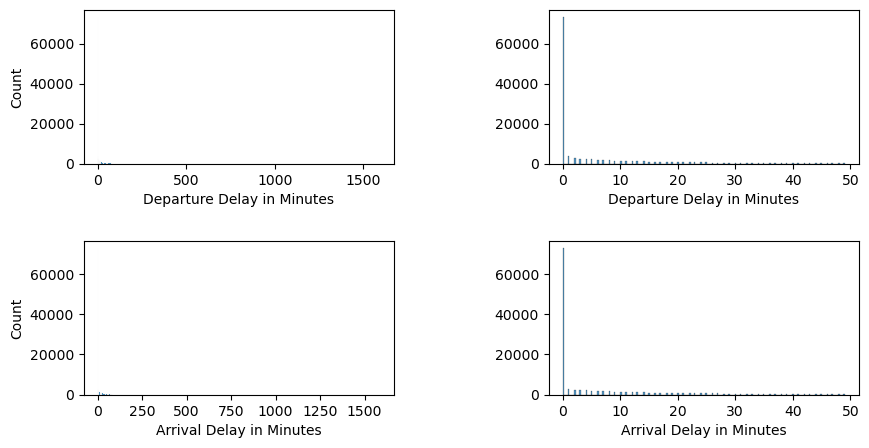

In [78]:
figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.histplot(data=df,x="Departure Delay in Minutes")

plt.subplot(2,2,2)
sns.histplot(data=df[df["Departure Delay in Minutes"]<50],x="Departure Delay in Minutes")
plt.ylabel(None)

plt.subplot(2,2,3)
sns.histplot(data=df,x="Arrival Delay in Minutes")

plt.subplot(2,2,4)
sns.histplot(data=df[df["Arrival Delay in Minutes"]<50],x="Arrival Delay in Minutes")
plt.ylabel(None)

plt.subplots_adjust(hspace=0.5,wspace=0.5)    
plt.show()

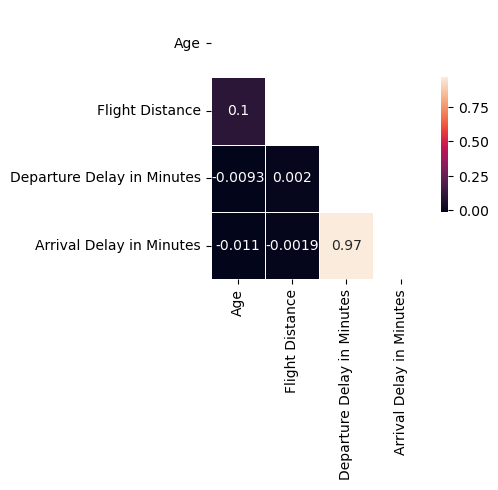

In [79]:
figure(figsize=(3.5,3.5))

corr=df[numerical].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

plt.show()

#### Performing pca to Arrival/Departure delay

In [80]:
pipe_pca = Pipeline([('Standardizer', StandardScaler()), ('PCA', PCA())])
X_train_pca = pipe_pca.fit_transform(df_train[["Departure Delay in Minutes","Arrival Delay in Minutes"]])
X_train_pca = pd.DataFrame(X_train_pca, columns= [f"PC_{i}" for i in range(2)])
X_train_pca

,PC_0,PC_1
0,0.242,-0.139
1,-0.423,0.087
2,-0.551,-0.004
3,-0.182,-0.043
4,-0.551,-0.004
...,...,...
103589,-0.495,-0.059
103590,-0.551,-0.004
103591,-0.165,0.122
103592,-0.551,-0.004


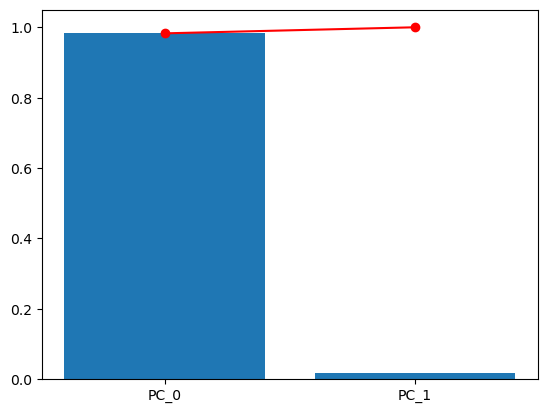

In [81]:
plt.plot([f"PC_{i}" for i in range(2)], pipe_pca["PCA"].explained_variance_ratio_.cumsum(),"-or")
plt.bar([f"PC_{i}" for i in range(2)], pipe_pca["PCA"].explained_variance_ratio_)

plt.show()

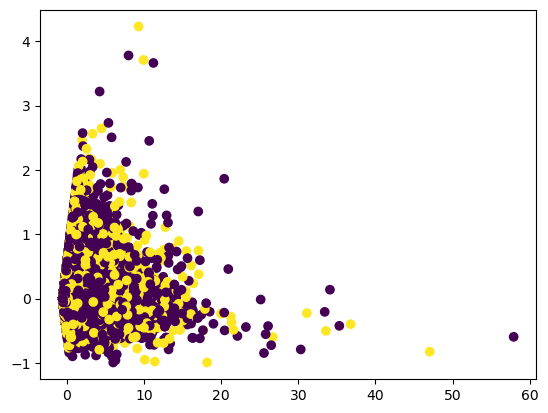

In [82]:
plt.scatter(X_train_pca["PC_0"], X_train_pca["PC_1"], c = y_train)

plt.show()

In [83]:
X_test_pca = pipe_pca.transform(df_test[["Departure Delay in Minutes","Arrival Delay in Minutes"]])
X_test_pca = pd.DataFrame(X_test_pca, columns= [f"PC_{i}" for i in range(2)])
X_test_pca

,PC_0,PC_1
0,0.706,-0.602
1,-0.441,0.106
2,-0.551,-0.004
3,-0.386,0.161
4,-0.551,-0.004
...,...,...
25888,-0.551,-0.004
25889,-0.533,0.015
25890,-0.551,-0.004
25891,-0.551,-0.004


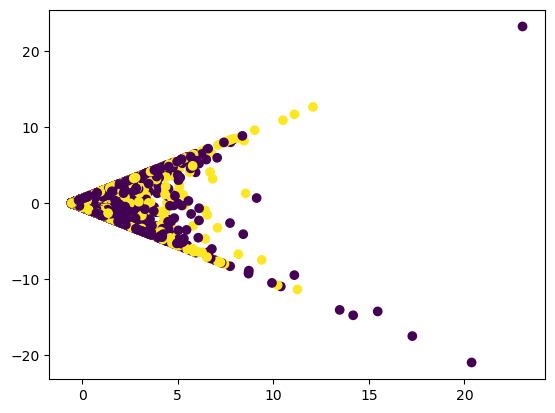

In [84]:
plt.scatter(X_test_pca["PC_0"], X_test_pca["PC_1"], c = y_test)

plt.show()

#### Scaling

In [85]:
X_num_train=pd.concat([pd.DataFrame(StandardScaler().fit_transform(df_train[["Age","Flight Distance"]]),columns=["Age","Flight Distance"]),X_train_pca["PC_0"]],axis=1)

X_num_test=pd.concat([pd.DataFrame(StandardScaler().fit_transform(df_test[["Age","Flight Distance"]]),columns=["Age","Flight Distance"]),X_test_pca["PC_0"]],axis=1)

In [86]:
X_num_train

,Age,Flight Distance,PC_0
0,-1.746,-0.731,0.242
1,-0.952,-0.957,-0.423
2,-0.885,-0.047,-0.551
3,-0.952,-0.629,-0.182
4,1.431,-0.978,-0.551
...,...,...,...
103589,-1.084,-1.000,-0.495
103590,0.637,1.161,-0.551
103591,-0.621,0.808,-0.165
103592,-1.150,-0.190,-0.551


In [87]:
X_cat_train.shape, X_num_train.shape, y_train.shape , X_cat_test.shape , X_num_test.shape, y_test.shape

((103594, 18), (103594, 3), (103594,), (25893, 18), (25893, 3), (25893,))

# FEATURES SELECTION

#### Categorical

In [88]:
def best_features_cat(n_best_ft, Xtr, ytr):
    ft = SelectKBest(chi2, k = n_best_ft).fit(Xtr, ytr)
    scores_df = pd.DataFrame(ft.scores_)
    columns_df = pd.DataFrame(Xtr.columns)
    pvalues_df=pd.DataFrame(ft.pvalues_)
    ft_scores = pd.concat([columns_df, scores_df,pvalues_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score',"Pvalues"]
    ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    return best_features

In [89]:
best_features_cat(18,X_cat_train,y_train)

,X_feature,Score,Pvalues
0,Class,22841.336,0.000
1,Online boarding,14709.257,0.000
2,Type of Travel,14407.089,0.000
3,Inflight entertainment,8691.513,0.000
4,Seat comfort,6384.881,0.000
5,Inflight wifi service,5403.193,0.000
6,On-board service,5284.790,0.000
7,Leg room service,5245.905,0.000
8,Cleanliness,5050.652,0.000
9,Baggage handling,3372.130,0.000


In [90]:
for i in X_cat_train.columns:
    print(i,":", X_cat_train[i].unique())

Gender : [1 0]
Customer Type : [0 1]
Type of Travel : [1 0]
Class : [1 2 0]
Inflight wifi service : [3 2 4 1 5 0]
Departure/Arrival time convenient : [4 2 5 3 1 0]
Ease of Online booking : [3 2 5 4 1 0]
Gate location : [1 3 2 5 4 0]
Food and drink : [5 1 2 4 3 0]
Online boarding : [3 5 2 1 4 0]
Seat comfort : [5 1 2 3 4 0]
Inflight entertainment : [5 1 2 3 4 0]
On-board service : [4 1 2 3 5 0]
Leg room service : [3 5 4 2 1 0]
Checkin service : [4 1 3 5 2 0]
Inflight service : [5 4 3 1 2 0]
Cleanliness : [5 1 2 3 4 0]
Baggage handling : [3 2 4 0 1]


In [91]:
df=[1,2,4,5]

chi2_critical_values_1=[chi_2.ppf(0.01,i) for i in df]
chi2_critical_values_5=[chi_2.ppf(0.05,i) for i in df]
chi2_critical_values_10=[chi_2.ppf(0.10,i) for i in df]

for c in range(4):
    print("critical_values_5: ",chi2_critical_values_5[c])

critical_values_5:  0.003932140000019522
critical_values_5:  0.10258658877510106
critical_values_5:  0.7107230213973239
critical_values_5:  1.1454762260617692


In [92]:
print(chi2_critical_values_1,"\n")
print(chi2_critical_values_10)

[0.00015708785790970184, 0.020100671707002873, 0.2971094805065319, 0.5542980767282772] 

[0.01579077409343122, 0.21072103131565273, 1.063623216779224, 1.6103079869623227]


In [93]:
X_cat_train.drop(["Gate location"],axis=1,inplace=True)

X_cat_test.drop(["Gate location"],axis=1,inplace=True)

#### Numerical

In [94]:
def best_features_num(n_best_ft, Xtr, ytr):
    ft = SelectKBest(mutual_info_classif, k = n_best_ft).fit(Xtr, ytr)
    scores_df = pd.DataFrame(ft.scores_)
    columns_df = pd.DataFrame(Xtr.columns)
    pvalues_df=pd.DataFrame(ft.pvalues_)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    return best_features

In [95]:
best_features_num(3,X_num_train,y_train)

,X_feature,Score
0,Flight Distance,0.062
1,Age,0.047
2,PC_0,0.006


In [96]:
np.sort(mutual_info_classif(X_num_train,y_train,n_neighbors=10))

array([0.00631018, 0.04569593, 0.0618553 ])

# SPLITTING TRAINING AND VALIDITATION SET

In [97]:
X_train=X_cat_train.to_numpy()
X_test=X_cat_test.to_numpy()

In [98]:
rnd=42

splitter = StratifiedShuffleSplit(random_state=rnd, test_size=0.2, n_splits=1)
train_idx, val_idx = next(splitter.split(X_train, y_train))
X_train, X_val = X_train[train_idx], X_train[val_idx]
y_train, y_val = y_train[train_idx], y_train[val_idx]


In [99]:
np.bincount(y_train)/len(y_train),np.bincount(y_val)/len(y_val), np.bincount(y_test)/len(y_test)

(array([0.5666003, 0.4333997]),
 array([0.56662966, 0.43337034]),
 array([0.56107828, 0.43892172]))

# MODELS

# Logistic regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
par_gr_lr={'penalty':['l1', 'l2', 'elasticnet', 'none'],"C": [0.1,1,10],"fit_intercept": [True,False],
            "solver" :["lbfgs", "liblinear", "newton-cg", "sag", "saga"], "max_iter":[10,100,1000],
            "warm_start": [True,False]}

lr=LogisticRegression()

lr_opt_gr = GridSearchCV(lr, par_gr_lr)
lr_opt_gr.fit(X_train, y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the n

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'fit_intercept': [True, False],
                         'max_iter': [10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga'],
                         'warm_start': [True, False]})

In [103]:
print('Best parameters: ', lr_opt_gr.best_params_)

Best parameters:  {'C': 0.1, 'fit_intercept': True, 'max_iter': 10, 'penalty': 'none', 'solver': 'sag', 'warm_start': True}


In [104]:
par_grid_lr={"max_iter": [10,100,1000],"C":[0.001,0.01,0.1]}

lr=LogisticRegression(warm_start= True, solver= 'sag', penalty='none', fit_intercept= True)

lr_opt_gs = GridSearchCV(lr, par_grid_lr)
lr_opt_gs.fit(X_train, y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

GridSearchCV(estimator=LogisticRegression(penalty='none', solver='sag',
                                          warm_start=True),
             param_grid={'C': [0.001, 0.01, 0.1], 'max_iter': [10, 100, 1000]})

In [105]:
print('Best parameters: ', lr_opt_gs.best_params_)

Best parameters:  {'C': 0.001, 'max_iter': 10}


In [106]:
par_grid_lr={"max_iter": np.arange(5,55,5),"C":[0.0001,0.0005,0.001]}

lr=LogisticRegression(warm_start= True, solver= 'sag', penalty='none', fit_intercept= True)

lr_opt_gs = GridSearchCV(lr, par_grid_lr)
lr_opt_gs.fit(X_train, y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.war

GridSearchCV(estimator=LogisticRegression(penalty='none', solver='sag',
                                          warm_start=True),
             param_grid={'C': [0.0001, 0.0005, 0.001],
                         'max_iter': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])})

In [107]:
print('Best parameters: ', lr_opt_gs.best_params_)

Best parameters:  {'C': 0.001, 'max_iter': 10}


In [241]:
lr=LogisticRegression(warm_start= True, solver= 'sag', penalty='none', fit_intercept= True,C=0.001,max_iter=10,random_state=42)

lr.fit(X_train,y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.001, max_iter=10, penalty='none', random_state=42,
                   solver='sag', warm_start=True)

In [242]:
y_val_pred_lr=lr.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_lr))
print("accuracy: ",accuracy_score(y_val,y_val_pred_lr))

f1_score:  0.8487600022700186
accuracy:  0.8713741010666538


In [243]:
lr.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_lr = lr.predict(X_test)

f1_lg=f1_score(y_test, y_test_pred_lr)
accuracy_lg=accuracy_score(y_test,y_test_pred_lr)

print("f1_score LogisticRegression: ",f1_lg)
print("accuracy LogisticRegression: ",accuracy_lg)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


f1_score LogisticRegression:  0.8426204481163844
accuracy LogisticRegression:  0.8646352295987333


c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## XGBoost Classifier

In [113]:
import xgboost
from xgboost import XGBClassifier

In [118]:
par_gr_xgb={"n_estimators": [10,100,1000], "max_depth": [10,20,50,100],
            "subsample": [0.1,0.5,1], "colsample_bytree": [0.1,0.5,1]}

xgb=XGBClassifier(booster="gbtree")

xgb_opt_gr = GridSearchCV(xgb, par_gr_xgb)

xgb_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.1, 0.5, 1],
                         'max_depth': [10, 20, 50, 100],
                         'n_estimators': [10, 100, 1000],
                         'subsample': [0.1, 0.5, 1]})

In [119]:
print('Best parameters: ', xgb_opt_gr.best_params_)

Best parameters:  {'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}


In [120]:
par_grid_xgb={"n_estimators": [50,100,200,500],"max_depth": [5,10,15], "subsample": [0.8,0.9,1],
             "colsample_bytree": [0.4,0.5,0.6]}

xgb=XGBClassifier(booster="gbtree")

xgb_opt_gs = GridSearchCV(xgb, par_grid_xgb)
xgb_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 200, 500],
                         'subsample': [0.8, 0.9, 1]})

In [121]:
print('Best parameters: ', xgb_opt_gs.best_params_)

Best parameters:  {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [122]:
par_grid_xgb={"n_estimators": [150,200,250,300],"max_depth": [4,5,6],
             "colsample_bytree": [0.6,0.7,0.8]}

xgb=XGBClassifier(booster="gbtree",subsample=1)

xgb_opt_gs = GridSearchCV(xgb, par_grid_xgb)
xgb_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [150, 200, 250, 300]})

In [123]:
print('Best parameters: ', xgb_opt_gs.best_params_)

Best parameters:  {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 200}


In [244]:
xgb=XGBClassifier(booster="gbtree",subsample=1,colsample_bytree=0.6,max_depth=5,n_estimators=200,random_state=42)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [245]:
y_val_pred_xgb=xgb.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_xgb))
print("accuracy: ",accuracy_score(y_val,y_val_pred_xgb))

f1_score:  0.9718920745789443
accuracy:  0.975915826053381


In [246]:
xgb.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_xgb =  xgb.predict(X_test)

f1_xgb=f1_score(y_test, y_test_pred_xgb)

accuracy_xgb=accuracy_score(y_test,y_test_pred_xgb)

print("f1_score XGBClassifier: ",f1_xgb)
print("accuracy XGBClassifier: ",accuracy_xgb)

f1_score XGBClassifier:  0.9538024164889837
accuracy XGBClassifier:  0.9598347043602518


## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
par_gr_rf={"bootstrap": [True,False], "max_samples": [None,0.1,0.5,1],
          "max_features":["sqrt", "log2", None],"criterion":["gini", "entropy", "log_loss"]}

rf=RandomForestClassifier()

rf_opt_gr = GridSearchCV(rf, par_gr_rf)

rf_opt_gr.fit(X_train, y_train)


c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [None, 0.1, 0.5, 1]})

In [131]:
print('Best parameters: ', rf_opt_gr.best_params_)

Best parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'log2', 'max_samples': 0.5}


In [133]:
par_gs_rf={"max_samples": [0.4,0.5,0.6],"n_estimators": [10,100,1000],"max_depth": [5,10,20]}

rf=RandomForestClassifier(max_features="log2", criterion="entropy",bootstrap=True)

rf_opt_gs = GridSearchCV(rf, par_gs_rf)

rf_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='log2'),
             param_grid={'max_depth': [5, 10, 20],
                         'max_samples': [0.4, 0.5, 0.6],
                         'n_estimators': [10, 100, 1000]})

In [134]:
print('Best parameters: ', rf_opt_gs.best_params_)

Best parameters:  {'max_depth': 20, 'max_samples': 0.6, 'n_estimators': 1000}


In [136]:
par_gs_rf={"max_samples": [0.6,0.7,0.8],"n_estimators": [500,1000,1500],"max_depth": [20,30,50]}

rf=RandomForestClassifier(max_features="log2", criterion="entropy",bootstrap=True)

rf_opt_gs = GridSearchCV(rf, par_gs_rf)

rf_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              max_features='log2'),
             param_grid={'max_depth': [20, 30, 50],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [1000, 1500, 2000]})

In [137]:
print('Best parameters: ', rf_opt_gs.best_params_)

Best parameters:  {'max_depth': 20, 'max_samples': 0.8, 'n_estimators': 1000}


In [139]:
par_gs_rf={"max_samples": [0.8,0.9]}

rf=RandomForestClassifier(max_features="log2", criterion="entropy",bootstrap=True,max_depth=20,n_estimators=1000)

rf_opt_gs = GridSearchCV(rf, par_gs_rf)

rf_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=20,
                                              max_features='log2',
                                              n_estimators=1000),
             param_grid={'max_samples': [0.8, 0.9]})

In [140]:
print('Best parameters: ', rf_opt_gs.best_params_)

Best parameters:  {'max_samples': 0.9}


In [247]:
rf=RandomForestClassifier(max_features="log2", criterion="entropy",bootstrap=True,max_depth=20,n_estimators=1000,max_samples=0.9,random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       max_samples=0.9, n_estimators=1000, random_state=42)

In [248]:
y_val_pred_rf=rf.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_rf))
print("accuracy: ",accuracy_score(y_val,y_val_pred_rf))

f1_score:  0.9925536084205812
accuracy:  0.9935807712727448


In [249]:
rf.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_rf =  rf.predict(X_test)

f1_rf=f1_score(y_test, y_test_pred_rf)
accuracy_rf=accuracy_score(y_test,y_test_pred_rf)

print("f1_score: ",f1_rf)
print("accuracy: ",accuracy_rf)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


f1_score:  0.9575714221844681
accuracy:  0.9633491677287298


## GradientBoostingClassifier

In [149]:
from sklearn.ensemble import GradientBoostingClassifier

In [151]:
par_gr_gb={"loss":["log_loss", "exponential"],"criterion":["friedman_mse", "squared_error"],"max_features":["sqrt", "log2"]}

gb=GradientBoostingClassifier()

gb_opt_gr = GridSearchCV(gb, par_gr_gb)

gb_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2']})

In [152]:
print('Best parameters: ', gb_opt_gr.best_params_)

Best parameters:  {'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'log2'}


In [158]:
par_gr_gb={"learning_rate": [0.1,1],"n_estimators":[10,100,1000],"subsample": [0.1,1],
           "min_samples_split": [0.1,0.2],"max_depth": [5,10]}

gb=GradientBoostingClassifier(max_features="log2",loss="exponential",criterion="squared_error")

gb_opt_gr = GridSearchCV(gb, par_gr_gb)

gb_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  loss='exponential',
                                                  max_features='log2'),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [5, 10],
                         'min_samples_split': [0.1, 0.2],
                         'n_estimators': [10, 100, 1000],
                         'subsample': [0.1, 1]})

In [161]:
print('Best parameters: ', gb_opt_gr.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 20, 'min_samples_split': 0.01, 'subsample': 1}


In [160]:
par_gr_gb={"learning_rate": [0.01,0.1],"subsample": [0.5,1],
           "min_samples_split": [0.01,0.1],"max_depth": [10,20]}

gb=GradientBoostingClassifier(max_features="log2",loss="exponential",criterion="squared_error",n_estimators=1000)

gb_opt_gr = GridSearchCV(gb, par_gr_gb)

gb_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  loss='exponential',
                                                  max_features='log2',
                                                  n_estimators=1000),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [10, 20],
                         'min_samples_split': [0.01, 0.1],
                         'subsample': [0.5, 1]})

In [162]:
print('Best parameters: ', gb_opt_gr.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 20, 'min_samples_split': 0.01, 'subsample': 1}


In [164]:
par_gr_gb={"learning_rate": [0.001,0.01],"min_samples_split": [0.001,0.01]}

gb=GradientBoostingClassifier(max_features="log2",loss="exponential",criterion="squared_error",n_estimators=1000,subsample=1,max_depth=20)

gb_opt_gr = GridSearchCV(gb, par_gr_gb)

gb_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  loss='exponential',
                                                  max_depth=20,
                                                  max_features='log2',
                                                  n_estimators=1000,
                                                  subsample=1),
             param_grid={'learning_rate': [0.001, 0.01],
                         'min_samples_split': [0.001, 0.01]})

In [165]:
print('Best parameters: ', gb_opt_gr.best_params_)

Best parameters:  {'learning_rate': 0.01, 'min_samples_split': 0.01}


In [250]:
gb=GradientBoostingClassifier(max_features="log2",loss="exponential",criterion="squared_error",
                              n_estimators=1000,subsample=1,max_depth=20,learning_rate=0.01,min_samples_split=0.01,random_state=42)

gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           loss='exponential', max_depth=20,
                           max_features='log2', min_samples_split=0.01,
                           n_estimators=1000, random_state=42, subsample=1)

In [251]:
y_val_pred_gb=gb.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_gb))
print("accuracy: ",accuracy_score(y_val,y_val_pred_gb))

f1_score:  0.9698441382426023
accuracy:  0.9742265553356823


In [252]:
gb.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_gb =  gb.predict(X_test)

f1_gb=f1_score(y_test, y_test_pred_gb)
accuracy_gb=accuracy_score(y_test,y_test_pred_gb)

print("f1_score: ",f1_gb)
print("accuracy: ",accuracy_gb)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


f1_score:  0.95654501650754
accuracy:  0.9623836558143127


## Voting Classifier

In [169]:
from sklearn.ensemble import VotingClassifier

### Hard voting

In [253]:
vch=VotingClassifier(estimators=[('rfc', rf), ('xgb', xgb), ('gbc', gb)], voting='hard')

vch.fit(X_train, y_train.ravel())

y_val_pred_vch=vch.predict(X_val)

print("f1_score: ",f1_score(y_val.ravel(),y_val_pred_vch))
print("accuracy: ",accuracy_score(y_val.ravel(),y_val_pred_vch))

f1_score:  0.9762750070442378
accuracy:  0.9796804865099668


In [254]:
vch.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train.ravel(),y_val.ravel()]))

y_test_pred_vch=vch.predict(X_test)

f1_vch=f1_score(y_test.ravel(),y_test_pred_vch)
accuracy_vch=accuracy_score(y_test.ravel(),y_test_pred_vch)

print("f1_score: ",f1_vch)
print("accuracy: ",accuracy_vch)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


f1_score:  0.95750379430408
accuracy:  0.9632333062989997


### Soft voting

In [255]:
vcs=VotingClassifier(estimators=[('rfc', rf), ('xgb', xgb), ('gbc', gb)], voting='soft')

vcs.fit(X_train, y_train.ravel())

y_val_pred_vcs=vcs.predict(X_val)

print("f1_score: ",f1_score(y_val.ravel(),y_val_pred_vcs))
print("accuracy: ",accuracy_score(y_val.ravel(),y_val_pred_vcs))

f1_score:  0.9778504198838979
accuracy:  0.9810319030841257


In [257]:
vcs.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train.ravel(),y_val.ravel()]))

y_test_pred_vcs=vcs.predict(X_test)

f1_vcs=f1_score(y_test.ravel(),y_test_pred_vcs)
accuracy_vcs=accuracy_score(y_test.ravel(),y_test_pred_vcs)

print("f1_score: ",f1_vcs)
print("accuracy: ",accuracy_vcs)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


f1_score:  0.9571039592911663
accuracy:  0.9628857220098096


# MODELS EVALUATION

In [174]:
from sklearn.metrics import classification_report

In [289]:
rep_xgb=classification_report(y_test,y_test_pred_xgb,digits=3)

rep_rf=classification_report(y_test,y_test_pred_rf,digits=3)

rep_gb=classification_report(y_test,y_test_pred_gb,digits=3)

rep_vch=classification_report(y_test,y_test_pred_vch,digits=3)

rep_vcs=classification_report(y_test,y_test_pred_vcs,digits=3)

In [290]:
print("XGB Report:\n",rep_xgb,"\n\nRandomForest:\n",rep_rf,"\n\nGradientBoosting:\n",rep_gb,"\n\nHard Voting:\n",rep_vch,
     "\n\nSoft Voting:\n",rep_vcs)

XGB Report:
               precision    recall  f1-score   support

           0      0.957     0.972     0.964     14528
           1      0.963     0.945     0.954     11365

    accuracy                          0.960     25893
   macro avg      0.960     0.958     0.959     25893
weighted avg      0.960     0.960     0.960     25893
 

RandomForest:
               precision    recall  f1-score   support

           0      0.956     0.980     0.968     14528
           1      0.973     0.942     0.958     11365

    accuracy                          0.963     25893
   macro avg      0.965     0.961     0.963     25893
weighted avg      0.964     0.963     0.963     25893
 

GradientBoosting:
               precision    recall  f1-score   support

           0      0.957     0.977     0.967     14528
           1      0.970     0.943     0.957     11365

    accuracy                          0.962     25893
   macro avg      0.963     0.960     0.962     25893
weighted avg      0.963

# FEATURE IMPORTANCE

In [260]:
def feature_importance(n_best_ft, alg):
    scores_df = pd.DataFrame(alg.feature_importances_)
    columns_df = pd.DataFrame(X_cat_train.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    #ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    best_features.index+=1
    return best_features

In [261]:
print("Random Forest:\n",feature_importance(10,rf),"\n\nXgb:\n",feature_importance(10,xgb),"\n\nGradient Boosting:\n",
     feature_importance(10,gb))

Random Forest:
                             X_feature  Score
1                              Gender  0.004
2                       Customer Type  0.041
3                      Type of Travel  0.096
4                               Class  0.091
5               Inflight wifi service  0.166
6   Departure/Arrival time convenient  0.017
7              Ease of Online booking  0.044
8                       Gate location  0.016
9                      Food and drink  0.012
10                    Online boarding  0.155 

Xgb:
                             X_feature  Score
1                              Gender  0.006
2                       Customer Type  0.062
3                      Type of Travel  0.175
4                               Class  0.117
5               Inflight wifi service  0.101
6   Departure/Arrival time convenient  0.012
7              Ease of Online booking  0.017
8                       Gate location  0.014
9                      Food and drink  0.003
10                    Online bo

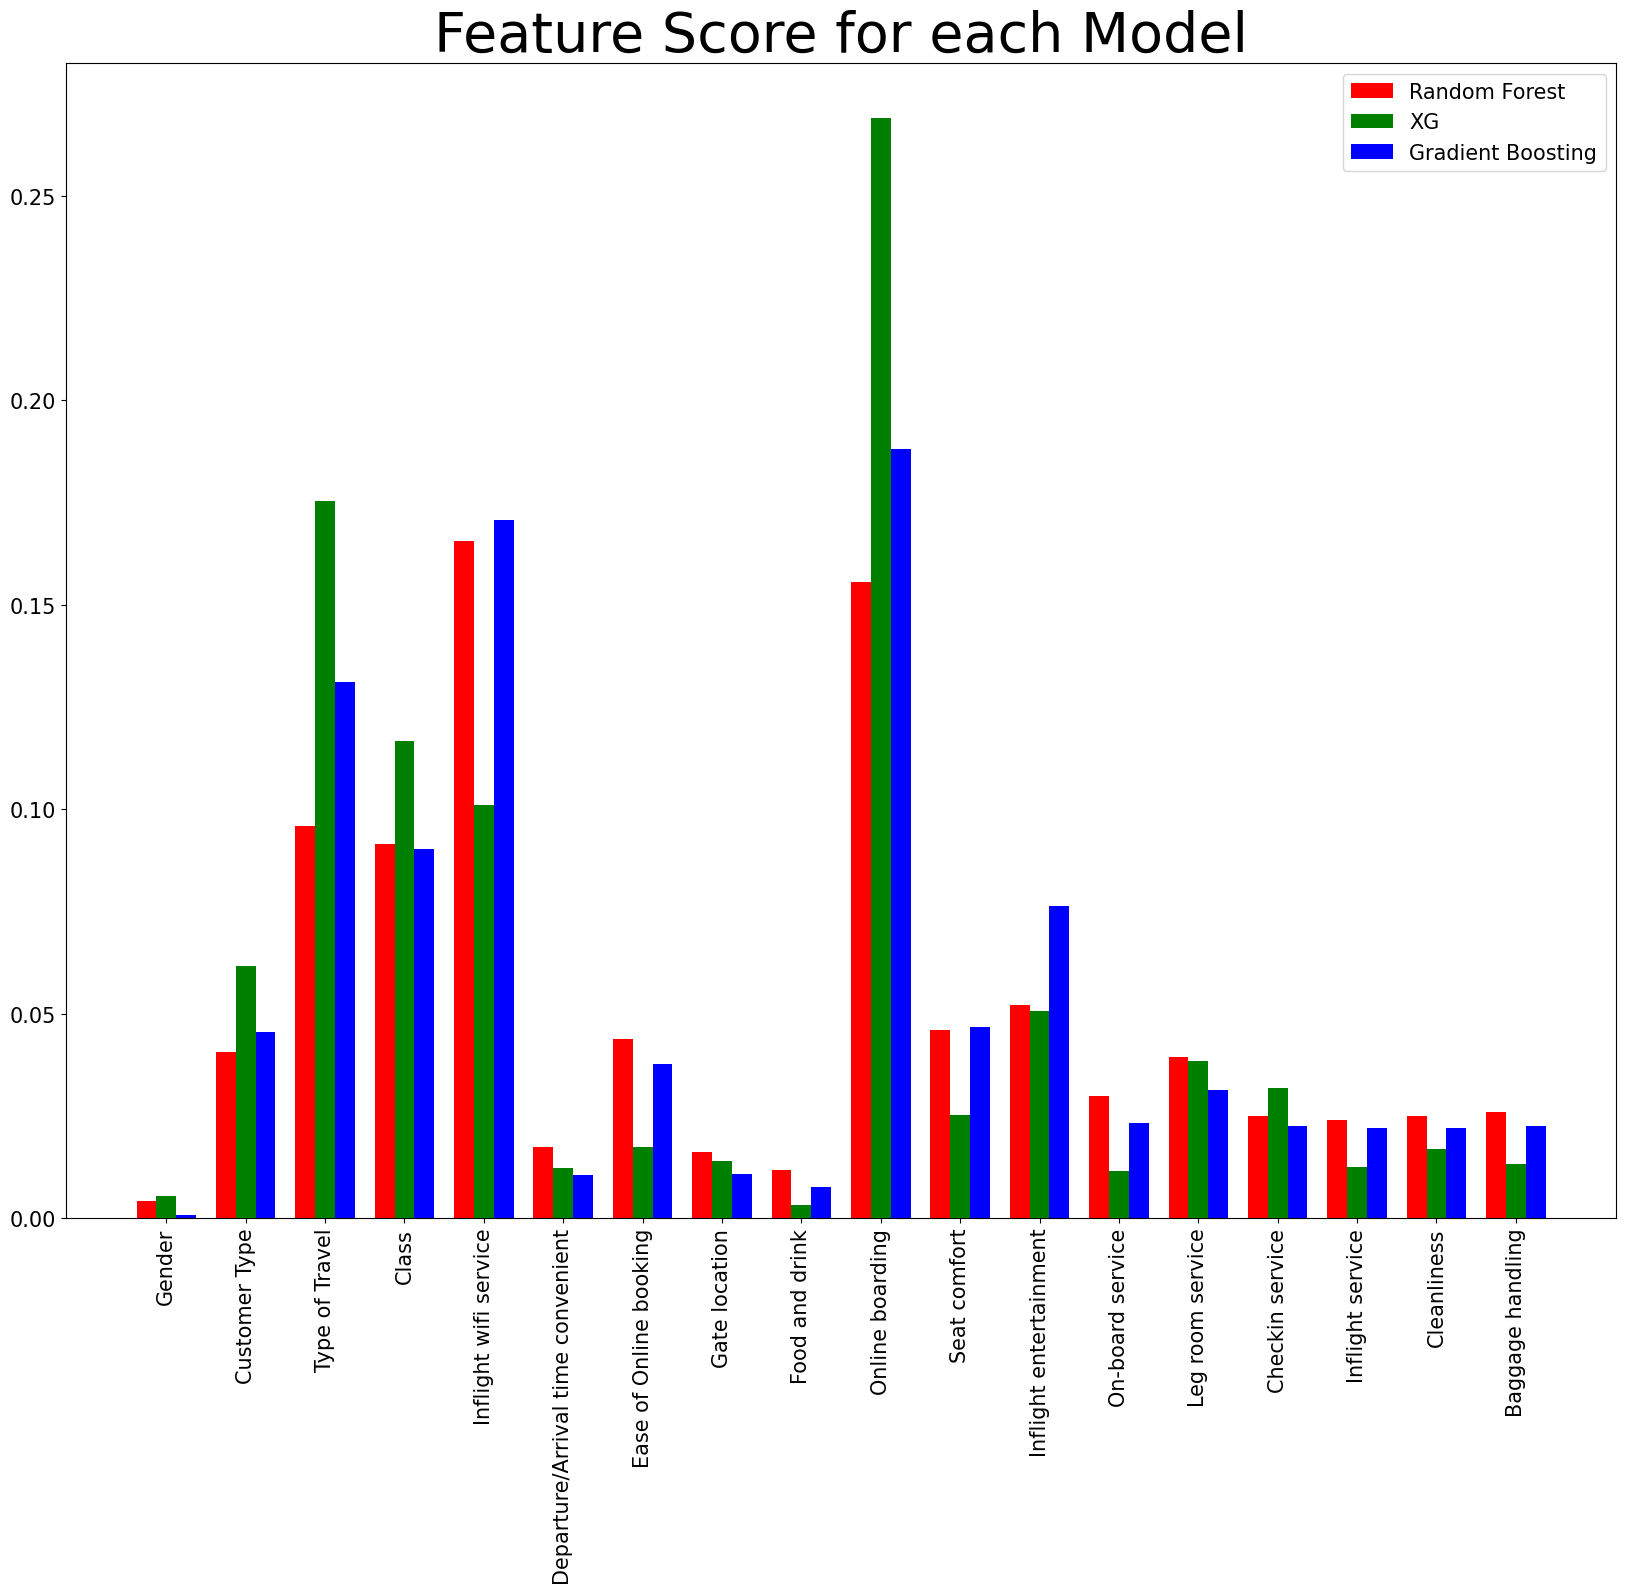

In [262]:
figure(figsize=(20,15))
N = len(X_cat_train.columns)
ind = np.arange(N)  
width = 0.25
  
xvals = feature_importance(N,rf)["Score"]
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = feature_importance(N,xgb)["Score"]
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = feature_importance(N,gb) ["Score"]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.xlabel(None) 
plt.ylabel(None) 
plt.title("Feature Score for each Model",fontsize=40) 
  
plt.xticks(ind+width,X_cat_train.columns, rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.legend((bar1, bar2, bar3), ("Random Forest", 'XG', 'Gradient Boosting'),fontsize=15) 
plt.show() 

# MODELS WITHOUT FEATURE SELECTION

In [263]:
X_cat_le_train=df_train[["Gender","Customer Type","Type of Travel"]].apply(LabelEncoder().fit_transform)
X_cat_le_test=df_test[["Gender","Customer Type","Type of Travel"]].apply(LabelEncoder().fit_transform)

oe=OrdinalEncoder(categories=[["Eco","Eco Plus","Business"]])
X_cat_oe_train=pd.Series(data=oe.fit_transform(np.array(df_train["Class"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Class")
X_cat_oe_test=pd.Series(data=oe.transform(np.array(df_test["Class"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Class")

oe2=OrdinalEncoder(categories=[[0,1,2,3,4,5] for i in range(13)])
X_cat_oe2_train=pd.DataFrame(data=oe2.fit_transform(df_train[["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"]]).astype(int),
                                                                columns=["Inflight wifi service","Departure/Arrival time convenient",
                                                                       "Ease of Online booking","Gate location","Food and drink",
                                                                       "Online boarding","Seat comfort","Inflight entertainment",
                                                                       "On-board service","Leg room service","Checkin service",
                                                                       "Inflight service","Cleanliness"])
X_cat_oe2_test=pd.DataFrame(data=oe2.transform(df_test[["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"]]).astype(int),
                                                              columns=["Inflight wifi service","Departure/Arrival time convenient",
                                                                    "Ease of Online booking","Gate location","Food and drink",
                                                                    "Online boarding","Seat comfort","Inflight entertainment",
                                                                    "On-board service","Leg room service","Checkin service",
                                                                    "Inflight service","Cleanliness"])

oe3=OrdinalEncoder(categories=[[1,2,3,4,5]])
X_cat_oe3_train=pd.Series(data=oe3.fit_transform(np.array(df_train["Baggage handling"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Baggage handling")
X_cat_oe3_test=pd.Series(data=oe3.transform(np.array(df_test["Baggage handling"]).reshape(-1,1)).reshape(1,-1)[0].astype(int),
                         name="Baggage handling")

y_train=pd.Series(LabelEncoder().fit_transform(df_train["satisfaction"]),name="satisfaction_train")
y_test=pd.Series(LabelEncoder().fit_transform(df_test["satisfaction"]),name="satisfaction_test")


In [264]:
X_cat_train=pd.concat([X_cat_le_train,X_cat_oe_train,X_cat_oe2_train,X_cat_oe3_train], axis=1)

X_cat_test=pd.concat([X_cat_le_test,X_cat_oe_test,X_cat_oe2_test,X_cat_oe3_test],axis=1)

In [265]:
X_cat_train

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Checkin service,Inflight service,Cleanliness,Baggage handling
0,1,0,1,1,3,4,3,1,5,3,5,5,4,3,4,5,5,3
1,1,1,0,2,3,2,3,3,1,3,1,1,1,5,1,4,1,2
2,0,0,0,2,2,2,2,2,5,5,5,5,4,3,4,4,5,3
3,0,0,0,2,2,5,5,5,2,2,2,2,2,5,1,4,2,2
4,1,0,0,2,3,3,3,3,4,5,5,3,3,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,0,1,0,0,2,1,2,3,2,2,2,2,3,1,2,3,2,3
103590,1,0,0,2,4,4,4,4,2,4,5,5,5,5,5,5,4,4
103591,1,1,0,2,1,1,1,3,4,1,5,4,3,2,5,5,4,3
103592,0,1,0,0,1,1,1,5,1,1,1,1,4,5,5,4,1,0


In [266]:
sts=StandardScaler()

X_num_train=pd.DataFrame(sts.fit_transform(df_train[numerical]),columns=numerical)

X_num_test=pd.DataFrame(sts.transform(df_test[numerical]),columns=numerical)

X_num_train

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.746,-0.731,0.269,0.073
1,-0.952,-0.957,-0.361,-0.237
2,-0.885,-0.047,-0.387,-0.392
3,-0.952,-0.629,-0.098,-0.160
4,1.431,-0.978,-0.387,-0.392
...,...,...,...,...
103589,-1.084,-1.000,-0.308,-0.392
103590,0.637,1.161,-0.387,-0.392
103591,-0.621,0.808,-0.203,-0.030
103592,-1.150,-0.190,-0.387,-0.392


In [267]:
X_train=pd.concat([X_cat_train,X_num_train],axis=1).to_numpy()

X_test=pd.concat([X_cat_test,X_num_test],axis=1).to_numpy()

X_train

array([[ 1.        ,  0.        ,  1.        , ..., -0.73130527,
         0.26896611,  0.0729052 ],
       [ 1.        ,  1.        ,  0.        , ..., -0.95691613,
        -0.36068159, -0.23718437],
       [ 0.        ,  0.        ,  0.        , ..., -0.04745369,
        -0.38691691, -0.39222916],
       ...,
       [ 1.        ,  1.        ,  0.        , ...,  0.80786215,
        -0.20326967, -0.03045799],
       [ 0.        ,  1.        ,  0.        , ..., -0.18983921,
        -0.38691691, -0.39222916],
       [ 1.        ,  0.        ,  0.        , ...,  0.53512369,
        -0.38691691, -0.39222916]])

In [268]:
splitter = StratifiedShuffleSplit(random_state=rnd, test_size=0.2, n_splits=1)
train_idx, val_idx = next(splitter.split(X_train, y_train))
X_train, X_val = X_train[train_idx], X_train[val_idx]
y_train, y_val = y_train[train_idx], y_train[val_idx]

np.bincount(y_train)/len(y_train),np.bincount(y_val)/len(y_val), np.bincount(y_test)/len(y_test)

(array([0.5666003, 0.4333997]),
 array([0.56662966, 0.43337034]),
 array([0.56107828, 0.43892172]))

## Logistic Regression

In [190]:
par_gr_lr2={'penalty':['l1', 'l2', 'elasticnet', None],"fit_intercept": [True,False],
            "solver" :["lbfgs", "liblinear", "newton-cg", "sag", "saga"], 
            # "C": [0.1,1,10]
            "warm_start": [True,False]}

lr2=LogisticRegression(max_iter=1000)

lr2_opt_gr = GridSearchCV(lr2, par_gr_lr2)
lr2_opt_gr.fit(X_train, y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga'],
                         'warm_start': [True, False]})

In [191]:
print('Best parameters: ', lr2_opt_gr.best_params_)

Best parameters:  {'fit_intercept': True, 'penalty': 'l2', 'solver': 'liblinear', 'warm_start': True}


In [192]:
par_gr_lr2={"C":[0.001,0.01,0.1],"max_iter":[10,100,1000]}

lr2=LogisticRegression(fit_intercept=True,penalty="l2",solver="liblinear",warm_start=True)

lr2_opt_gr = GridSearchCV(lr2, par_gr_lr2)
lr2_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear', warm_start=True),
             param_grid={'C': [0.001, 0.01, 0.1], 'max_iter': [10, 100, 1000]})

In [193]:
print('Best parameters: ', lr2_opt_gr.best_params_)

Best parameters:  {'C': 0.1, 'max_iter': 10}


In [269]:
lr2=LogisticRegression(fit_intercept=True,penalty="l2",solver="liblinear",C=0.1,max_iter=10,warm_start=True,random_state=42)

lr2.fit(X_train,y_train)

y_val_pred_lr2=lr2.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_lr2))
print("accuracy: ",accuracy_score(y_val,y_val_pred_lr2))



f1_score:  0.8493726224947482
accuracy:  0.8719532795984363


In [270]:
lr2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_lr2 = lr2.predict(X_test)

f1_lr2=f1_score(y_test, y_test_pred_lr2)
accuracy_lr2=accuracy_score(y_test,y_test_pred_lr2)

print("F1 score: LogisticRegression: ",f1_lg ," LogisticRegression 2: ",f1_lr2)
print("Accuracy: LogisticRegression: ",accuracy_lg," LogisticRegression 2: ", accuracy_lr2 )

F1 score: LogisticRegression:  0.8426204481163844  LogisticRegression 2:  0.8427198419114345
Accuracy: LogisticRegression:  0.8646352295987333  LogisticRegression 2:  0.8647510910284633


## XGB Classifier

In [198]:
par_gr_xgb2={"n_estimators": [150,200,250,300],"max_depth": [4,5,6],
             "colsample_bytree": [0.6,0.7,0.8], "subsample": [0.1,0.5,1]}

xgb2=XGBClassifier(booster="gbtree")

xgb2_opt_gr = GridSearchCV(xgb2, par_gr_xgb2)

xgb2_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [150, 200, 250, 300],
                         'subsample': [0.1, 0.5, 1]})

In [199]:
print('Best parameters: ', xgb2_opt_gr.best_params_)

Best parameters:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1}


In [200]:
par_gr_xgb2={"n_estimators": [50,100,150]}

xgb2=XGBClassifier(booster="gbtree",colsample_bytree=0.7,max_depth=5,subsample=1)

xgb2_opt_gr = GridSearchCV(xgb2, par_gr_xgb2)

xgb2_opt_gr.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'n_estimators': [50, 100, 150]})

In [201]:
print('Best parameters: ', xgb2_opt_gr.best_params_)

Best parameters:  {'n_estimators': 100}


In [271]:
xgb2=XGBClassifier(booster="gbtree",n_estimators=100,max_depth=5,colsample_bytree=0.7,subsample=1,random_state=42)

xgb2.fit(X_train,y_train)

y_val_pred_xgb2=xgb2.predict(X_val)

y_val_pred_xgb2=xgb2.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_xgb2))
print("accuracy: ",accuracy_score(y_val,y_val_pred_xgb2))

f1_score:  0.9578893962455607
accuracy:  0.9639461363965443


In [272]:
xgb2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_xgb2 =  xgb2.predict(X_test)

f1_xgb2=f1_score(y_test, y_test_pred_xgb2)
accuracy_xgb2=accuracy_score(y_test,y_test_pred_xgb2)

print("F1 score: XGBC: ",f1_xgb ," XGBC 2: ",f1_xgb2)
print("Accuracy: XGBC: ",accuracy_xgb," XGBC 2: ", accuracy_xgb2)

F1 score: XGBC:  0.9538024164889837  XGBC 2:  0.9565566100788664
Accuracy: XGBC:  0.9598347043602518  XGBC 2:  0.9623450353377361


## Random Forest

In [208]:
par_gr_rf2={"bootstrap": [True,False],"max_features":["sqrt", "log2", None],"criterion":["gini", "entropy", "log_loss"],
            "max_samples": [None,0.1,0.5,1]}

rf2=RandomForestClassifier()

rf2_opt_gr = GridSearchCV(rf2, par_gr_rf2)

rf2_opt_gr.fit(X_train, y_train)

c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Angelo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [None, 0.1, 0.5, 1]})

In [209]:
print('Best parameters: ', rf2_opt_gr.best_params_)

Best parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'log2', 'max_samples': None}


In [211]:
par_gs_rf2={"n_estimators": [10,100,1000],"max_depth": [10,20,50]}

rf2=RandomForestClassifier(bootstrap=False,criterion="entropy", max_features="log2",max_samples=None)

rf2_opt_gs = GridSearchCV(rf2, par_gs_rf2)

rf2_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy',
                                              max_features='log2'),
             param_grid={'max_depth': [10, 20, 50],
                         'n_estimators': [10, 100, 1000]})

In [212]:
print('Best parameters: ', rf2_opt_gs.best_params_)

Best parameters:  {'max_depth': 50, 'n_estimators': 1000}


In [213]:
par_gs_rf2={"max_depth": [50,70,100]}

rf2=RandomForestClassifier(bootstrap=False,criterion="entropy", max_features="log2",max_samples=None,n_estimators=1000)

rf2_opt_gs = GridSearchCV(rf2, par_gs_rf2)

rf2_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                              criterion='entropy',
                                              max_features='log2',
                                              n_estimators=1000),
             param_grid={'max_depth': [50, 70, 100]})

In [214]:
print('Best parameters: ', rf2_opt_gs.best_params_)

Best parameters:  {'max_depth': 50}


In [273]:
rf2=RandomForestClassifier(bootstrap=False,criterion="entropy", max_features="log2",max_samples=None,n_estimators=1000,max_depth=50,random_state=42)

rf2.fit(X_train,y_train)

y_val_pred_rf2=rf2.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_rf2))
print("accuracy: ",accuracy_score(y_val,y_val_pred_rf2))

f1_score:  0.957986994628216
accuracy:  0.9641391959071384


In [274]:
rf2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_rf2 =  rf2.predict(X_test)

f1_rf2=f1_score(y_test, y_test_pred_rf2)
accuracy_rf2=accuracy_score(y_test,y_test_pred_rf2)

print("F1 score: RandomForest: ",f1_rf ," RandomForest 2: ",f1_rf2)
print("Accuracy: RandomForest: ",accuracy_rf," RandomForest 2: ", accuracy_rf2)

F1 score: RandomForest:  0.9575714221844681  RandomForest 2:  0.9574820047391246
Accuracy: RandomForest:  0.9633491677287298  RandomForest 2:  0.9632719267755764


## Gradient Boosting Classifier

In [217]:
par_gs_gb2={"loss":["log_loss", "exponential"],"criterion":["friedman_mse", "squared_error"],"max_features":["sqrt", "log2"]}

gb2=GradientBoostingClassifier()

gb2_opt_gs = GridSearchCV(gb2, par_gs_gb2)

gb2_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2']})

In [218]:
print('Best parameters: ', gb2_opt_gs.best_params_)

Best parameters:  {'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_features': 'sqrt'}


In [221]:
par_gs_gb2={"learning_rate": [0.01,0.1],"subsample": [0.5,1],"n_estimators":[100,1000],
           "min_samples_split": [0.01,0.1],"max_depth": [10,20]}

gb2=GradientBoostingClassifier(criterion="friedman_mse",loss="log_loss",max_features="sqrt")

gb2_opt_gs = GridSearchCV(gb2, par_gs_gb2)

gb2_opt_gs.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(max_features='sqrt'),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [10, 20],
                         'min_samples_split': [0.01, 0.1],
                         'n_estimators': [100, 1000], 'subsample': [0.5, 1]})

In [222]:
print('Best parameters: ', gb2_opt_gs.best_params_)

Best parameters:  {'learning_rate': 0.01, 'max_depth': 20, 'min_samples_split': 0.01, 'n_estimators': 1000, 'subsample': 1}


In [275]:
gb2=GradientBoostingClassifier(criterion="friedman_mse",loss="log_loss",max_features="sqrt",learning_rate=0.01,
                               max_depth=20,min_samples_split=0.01,n_estimators=1000,subsample=1,random_state=42)

gb2.fit(X_train,y_train)

y_val_pred_gb2=gb2.predict(X_val)

print("f1_score: ",f1_score(y_val,y_val_pred_gb2))
print("accuracy: ",accuracy_score(y_val,y_val_pred_gb2))

f1_score:  0.9610139761217675
accuracy:  0.9667454993001593


In [276]:
gb2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train,y_val]))

y_test_pred_gb2 =  gb2.predict(X_test)

f1_gb2=f1_score(y_test, y_test_pred_gb2)
accuracy_gb2=accuracy_score(y_test,y_test_pred_gb2)

print("F1 score: GradientBoosting: ",f1_gb ," GradientBoosting 2: ",f1_gb2)
print("Accuracy: GradientBoosting: ",accuracy_gb," GradientBoosting 2: ", accuracy_gb2)

F1 score: GradientBoosting:  0.95654501650754  GradientBoosting 2:  0.9574562968248305
Accuracy: GradientBoosting:  0.9623836558143127  GradientBoosting 2:  0.9631560653458464


## Voting Classifier

#### Hard Voting

In [277]:
vch2=VotingClassifier(estimators=[('rfc2', rf2), ('xgb2', xgb2), ('gbc2', gb2)], voting='hard')

vch2.fit(X_train, y_train.ravel())

y_val_pred_vch2=vch2.predict(X_val)

print("f1_score: ",f1_score(y_val.ravel(),y_val_pred_vch2))
print("accuracy: ",accuracy_score(y_val.ravel(),y_val_pred_vch2))

f1_score:  0.9607466063348418
accuracy:  0.9665041749119166


In [278]:
vch2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train.ravel(),y_val.ravel()]))

y_test_pred_vch2=vch2.predict(X_test)

f1_vch2=f1_score(y_test.ravel(),y_test_pred_vch2)
accuracy_vch2=accuracy_score(y_test.ravel(),y_test_pred_vch2)

print("F1 score: Hard Voting: ",f1_vch ," Hard Voting 2: ",f1_vch2)
print("Accuracy: Hard Voting: ",accuracy_vch," Hard Voting 2: ", accuracy_vch2)

F1 score: Hard Voting:  0.95750379430408  Hard Voting 2:  0.9585286371144146
Accuracy: Hard Voting:  0.9632333062989997  Hard Voting 2:  0.9641215772602634


#### Soft Voting

In [279]:
vcs2=VotingClassifier(estimators=[('rfc2', rf2), ('xgb2', xgb2), ('gbc2', gb2)], voting='soft')

vcs2.fit(X_train, y_train.ravel())

y_val_pred_vcs2=vcs2.predict(X_val)

print("f1_score: ",f1_score(y_val.ravel(),y_val_pred_vcs2))
print("accuracy: ",accuracy_score(y_val.ravel(),y_val_pred_vcs2))

f1_score:  0.9601900022619316
accuracy:  0.9660215261354312


In [280]:
vcs2.fit(np.concatenate([X_train,X_val], axis=0), np.concatenate([y_train.ravel(),y_val.ravel()]))

y_test_pred_vcs2=vcs2.predict(X_test)

f1_vcs2=f1_score(y_test.ravel(),y_test_pred_vcs2)
accuracy_vcs2=accuracy_score(y_test.ravel(),y_test_pred_vcs2)

print("F1 score: Soft Voting: ",f1_vcs ," Soft Voting 2: ",f1_vcs2)
print("Accuracy: Soft Voting: ",accuracy_vcs," Soft Voting 2: ", accuracy_vcs2)

F1 score: Soft Voting:  0.9571039592911663  Soft Voting 2:  0.9584541925119373
Accuracy: Soft Voting:  0.9628857220098096  Soft Voting 2:  0.9640443363071101


## Models Evaluation

In [295]:
X_train=pd.DataFrame(X_train,columns=df.drop(["index","satisfaction"],axis=1).columns)

X_val=pd.DataFrame(X_val,columns=df.drop(["index","satisfaction"],axis=1).columns)

X_test=pd.DataFrame(X_test,columns=df.drop(["index","satisfaction"],axis=1).columns)

X_train

X_train,y_train=pd.concat([X_train,X_val], axis=0),pd.concat([y_train,y_val],axis=0)

rf2.fit(X_train,y_train), xgb2.fit(X_train,y_train),gb2.fit(X_train,y_train),vch2.fit(X_train,y_train), vcs2.fit(X_train,y_train)

algo={"Random Forest":rf2,"XGB": xgb2,"Gradient Boosting": gb2,"Hard Voting":vch2, "Soft Voting": vcs2}

def f1_test(algorithms, X_test, y_test):
    f1_scores = {}
    for alg_name, alg in algorithms.items():
        y_pred = alg.predict(X_test)
        accuracy[alg_name] = round(accuracy_score(y_test,y_pred),5)
        f1_scores[alg_name] = round(f1_score(y_test, y_pred),5)
    return print("F1 scores: ",f1_scores, "\nAccuracy scores: ", accuracy)

f1_accuracy_test(algo,X_test,y_test)

In [285]:
print("F1 scores with festures selection:\nRandom Forest:",round(f1_rf,3)," XGB:",round(f1_xgb,3)," Gradient Boosting:",round(f1_gb,3),
      " Hard Voting:",round(f1_vch,3), " Soft Voting:", round(f1_vcs,3), "\nF1 scores without features selection:")
print("Random Forest 2:", round(f1_rf2,3)," XGB 2:", round(f1_xgb2,3)," Gradient Boosting 2:", round(f1_gb2,3)," Hard Voting 2:",round(f1_vch2,3),
       " Soft Voting 2:", round(f1_vcs2,3))

F1 scores with festures selection:
Random Forest: 0.958  XGB: 0.954  Gradient Boosting: 0.957  Hard Voting: 0.958  Soft Voting: 0.957 
F1 scores without features selection:
Random Forest 2: 0.957  XGB 2: 0.957  Gradient Boosting 2: 0.957  Hard Voting 2: 0.959  Soft Voting 2: 0.958


In [286]:
print("Accuracy scores with festures selection:\nRandom Forest:",round(accuracy_rf,3)," XGB:",round(accuracy_xgb,3)," Gradient Boosting:",round(accuracy_gb,3),
      " Hard Voting:",round(accuracy_vch,3), " Soft Voting:", round(accuracy_vcs,3), "\nAccuracy scores without features selection:")
print("Random Forest 2:", round(accuracy_rf2,3)," XGB 2:", round(accuracy_xgb2,3)," Gradient Boosting 2:", round(accuracy_gb2,3)," Hard Voting 2:",round(accuracy_vch2,3),
       " Soft Voting 2:", round(accuracy_vcs2,3))

Accuracy scores with festures selection:
Random Forest: 0.963  XGB: 0.96  Gradient Boosting: 0.962  Hard Voting: 0.963  Soft Voting: 0.963 
Accuracy scores without features selection:
Random Forest 2: 0.963  XGB 2: 0.962  Gradient Boosting 2: 0.963  Hard Voting 2: 0.964  Soft Voting 2: 0.964


In [291]:
rep_xgb2=classification_report(y_test,y_test_pred_xgb2,digits=3)

rep_rf2=classification_report(y_test,y_test_pred_rf2,digits=3)

rep_gb2=classification_report(y_test,y_test_pred_gb2,digits=3)

rep_vch2=classification_report(y_test,y_test_pred_vch2,digits=3)

rep_vcs2=classification_report(y_test,y_test_pred_vcs2,digits=3)

In [292]:
print("XGB Report:\n",rep_xgb2,"\n\nRandomForest:\n",rep_rf2,"\n\nGradientBoosting:\n",rep_gb2,"\n\nHard Voting:\n",rep_vch2,
     "\n\nSoft Voting:\n",rep_vcs2)

XGB Report:
               precision    recall  f1-score   support

           0      0.957     0.976     0.967     14528
           1      0.969     0.944     0.957     11365

    accuracy                          0.962     25893
   macro avg      0.963     0.960     0.962     25893
weighted avg      0.962     0.962     0.962     25893
 

RandomForest:
               precision    recall  f1-score   support

           0      0.956     0.980     0.968     14528
           1      0.973     0.942     0.957     11365

    accuracy                          0.963     25893
   macro avg      0.965     0.961     0.963     25893
weighted avg      0.964     0.963     0.963     25893
 

GradientBoosting:
               precision    recall  f1-score   support

           0      0.958     0.978     0.968     14528
           1      0.971     0.945     0.957     11365

    accuracy                          0.963     25893
   macro avg      0.964     0.961     0.962     25893
weighted avg      0.963

## Features importance

In [305]:
def feature_importance(n_best_ft, alg):
    scores_df = pd.DataFrame(alg.feature_importances_)
    columns_df = pd.DataFrame(X_train.columns)
    ft_scores = pd.concat([columns_df, scores_df], axis = 1)
    ft_scores.columns = ['X_feature', 'Score']
    ft_scores = ft_scores.sort_values('Score', ascending = False)
    best_features = ft_scores.head(n_best_ft).reset_index().drop(['index'], axis = 1)
    best_features.index+=1
    return best_features

In [306]:
print("Random Forest:\n",feature_importance(10,rf2),"\n\nXgb:\n",feature_importance(10,xgb2),"\n\nGradient Boosting:\n",
     feature_importance(10,gb2))

Random Forest:
                  X_feature  Score
1                    Class  0.163
2            Gate location  0.151
3                      Age  0.092
4           Type of Travel  0.087
5          Online boarding  0.051
6           Food and drink  0.045
7    Inflight wifi service  0.042
8   Inflight entertainment  0.040
9            Customer Type  0.039
10             Cleanliness  0.038 

Xgb:
                  X_feature  Score
1            Gate location  0.256
2           Type of Travel  0.142
3                      Age  0.130
4                    Class  0.093
5            Customer Type  0.057
6          Online boarding  0.054
7   Inflight entertainment  0.054
8         On-board service  0.046
9           Food and drink  0.027
10        Baggage handling  0.019 

Gradient Boosting:
                  X_feature  Score
1            Gate location  0.186
2                    Class  0.175
3                      Age  0.122
4           Type of Travel  0.102
5          Online boarding  0.073
6 

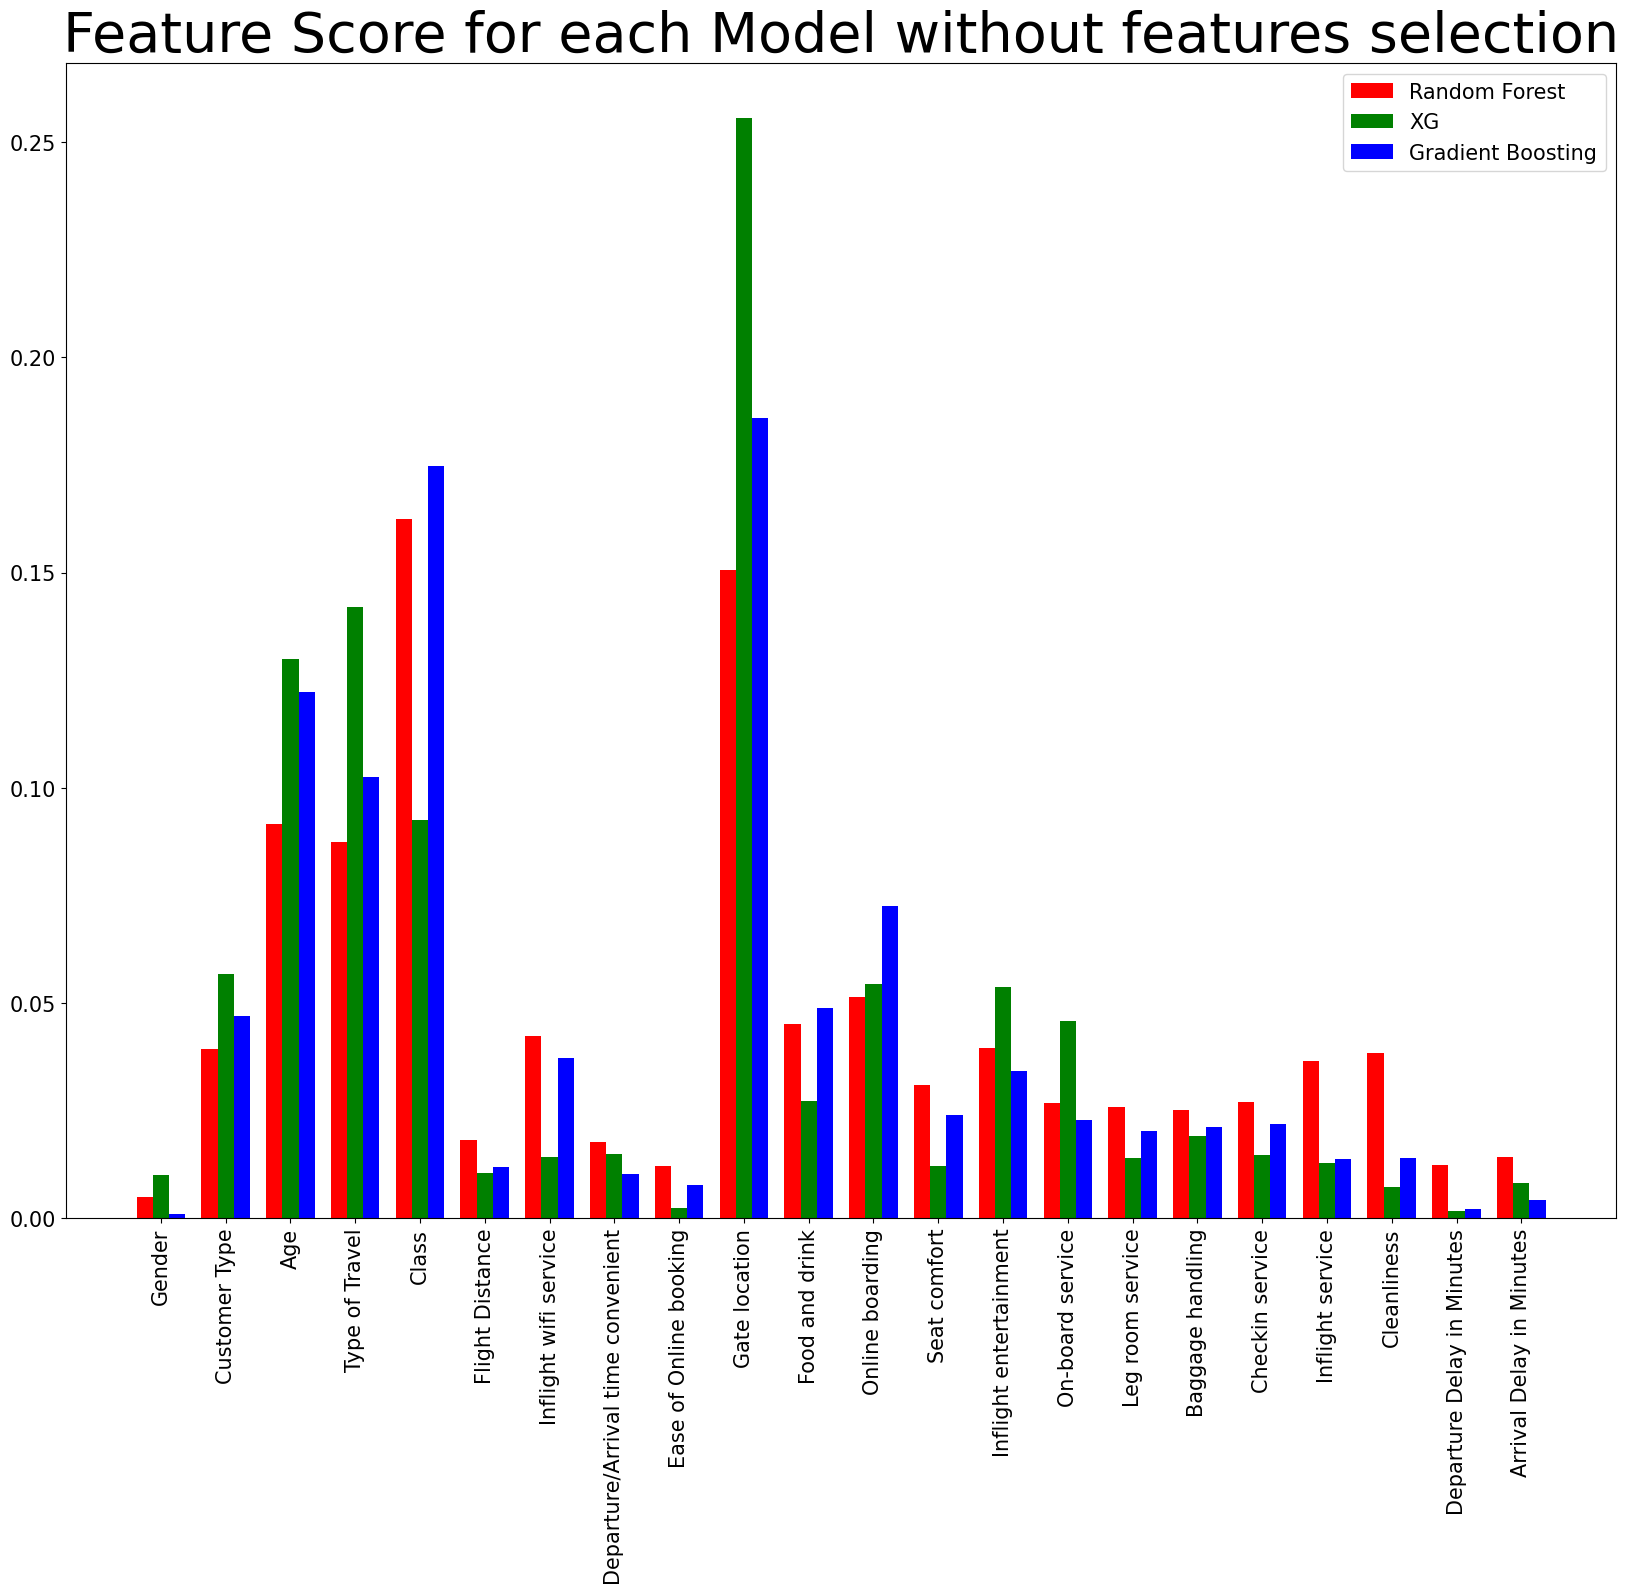

In [304]:
figure(figsize=(20,15))
N = len(X_train.columns)
ind = np.arange(N)  
width = 0.25
  
xvals = feature_importance(N,rf2)["Score"]
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = feature_importance(N,xgb2)["Score"]
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = feature_importance(N,gb2) ["Score"]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.xlabel(None) 
plt.ylabel(None) 
plt.title("Feature Score for each Model without features selection",fontsize=40) 
  
plt.xticks(ind+width,X_train.columns, rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.legend((bar1, bar2, bar3), ("Random Forest", 'XG', 'Gradient Boosting'),fontsize=15) 
plt.show() 